<h1>DRV Analysis</h1>

In [1]:
from properties import vwl_hold, vbl_hold, vblneg_hold, vwl_read, vbl_read, vblneg_read, w_ax_range
from properties import vdd_standard, vdd_seevinck
from properties import vsweep_standard, vsweep_seevinck, vsweep_gaussian_vth
from properties import rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard, dc_vsweep_seevinck, snm_max, snm_min, w_ax_step_param_seevinck, save_w_ax_seevinck, rit_models_montecarlo, dc_vsweep_gaussian_vth, step_param_run_gaussian_vth
from properties import vdd_standard_transient, tran_standard, vbl_hold_transient, vblneg_hold_transient, vsweep_standard_transient, step_param_run_standard_transient
from utils.path import ltspice, schematics, images, data
from utils.patterns import w_ax_standard_pattern, w_ax_seevinck_pattern, snm_max_seevinck_pattern, snm_min_seevinck_pattern
from models.snm import graphical_processing, rotate_points, seevinck_processing, RequestPlot
from models.ops import save_image, get_data, __init_model__, CircuitType, OperationType, RequestPlotSchematic
from matplotlib import pyplot as plt
import os
from statistics import mean, stdev
from IPython.display import Image, display
import numpy as np

In [2]:
# w_ax pick
w_ax_pos = 1

<h2>SNM Standard Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/hold/standard_hold.asc


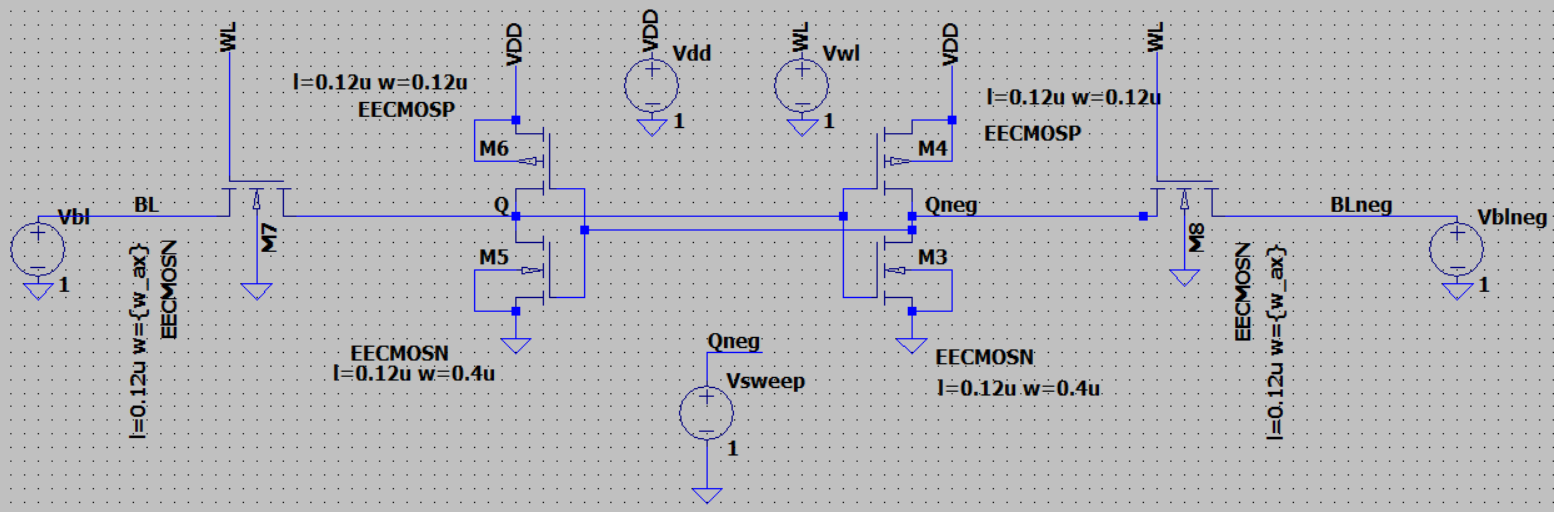

Successful/Total Simulations: 0/1
Raw file: data\in\standard\hold\standard_hold_1.raw, Log file: data\in\standard\hold\standard_hold_1.log
File opened successfully: data\in\standard\hold\standard_hold_1.raw
File updated successfully: ../../images/standard_hold_simulation.png


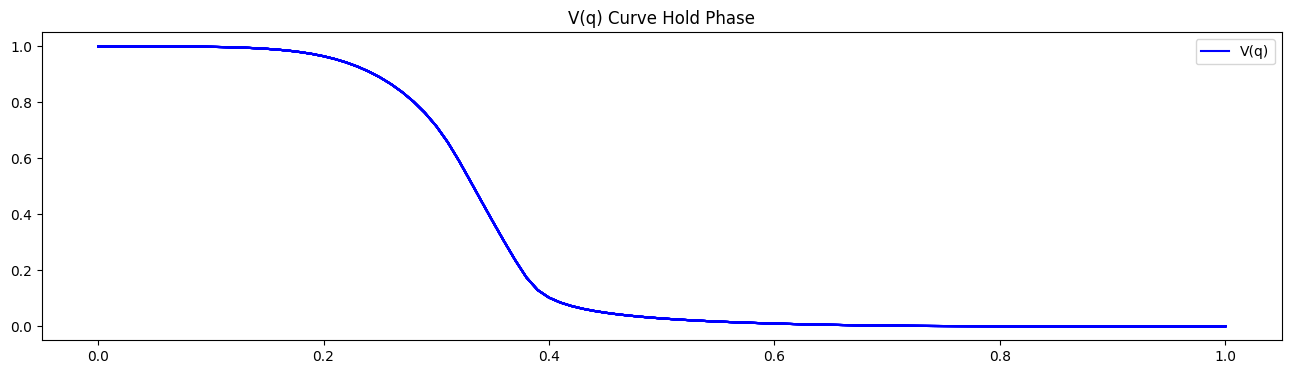

In [4]:
(
    steps, 
    vsweep_standard_hold, 
    i_leaks_standard_hold, 
    v_q_standard_hold, 
    v_q_neg_standard_hold,
    v_dd_standard_hold,
    v_wl_standard_hold,
    v_bl_standard_hold,
    v_blneg_standard_hold, 
    standard_hold_log
) = __init_model__(
    operation_type=OperationType.HOLD,
    circuit_type=CircuitType.STANDARD, 
    asc_file_path=os.path.join(ltspice, "standard/hold/standard_hold.asc"),
    schematic_image_path=os.path.join(schematics, "standard.png"),
    request_plot_schematic=RequestPlotSchematic.TRUE,
    vdd=vdd_standard,
    vsweep=vsweep_standard,
    vwl=vwl_hold,
    vbl=vbl_hold,
    vblneg=vblneg_hold,
    params=[rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard]
)

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Hold Phase")
plt.legend(["V(q)"])
save_image(image_path=os.path.join(images, "standard_hold_simulation.png"), plt=plt)
plt.show()

w_ax_standard_hold = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]


Text(0.5, 1.0, 'W AX Trend Hold Phase')

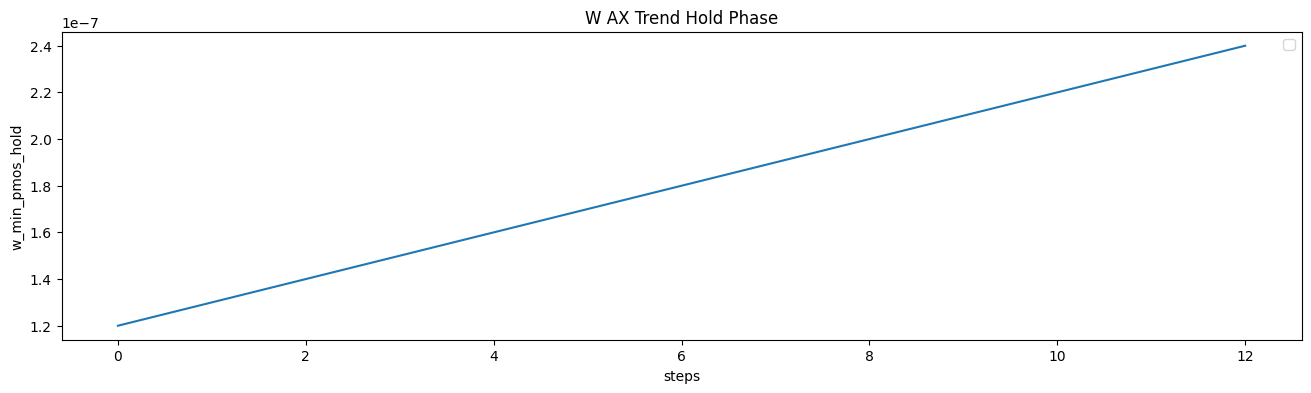

In [4]:
standard_hold_log_file_path = f"./{standard_hold_log}"

with open(standard_hold_log_file_path, "r") as file:
    content = file.read()

w_ax_standard_hold = get_data(pattern=w_ax_standard_pattern, content=content)
print(f'w_ax_standard_hold = {w_ax_standard_hold}')

plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_hold'])
plt.plot(w_ax_standard_hold, label='w_ax_standard_hold')
plt.ylabel('w_min_pmos_hold'); plt.xlabel('steps'); plt.title('W AX Trend Hold Phase')

w_ax                           SNM(HOLD)                     
1.2e-07                        262.43566244928326            
1.3e-07                        262.43550473079256            
1.4e-07                        262.43534129914343            
1.5e-07                        262.43517705584117            
1.6e-07                        262.4350036798156             
1.7e-07                        262.43482954124966            
1.8e-07                        262.43464673132866            
1.9e-07                        262.4344622101111             
2e-07                          262.43426967969657            
2.1e-07                        262.4340759824953             
2.2e-07                        262.43387439480875            
2.3e-07                        262.43367158989145            
2.4e-07                        262.43346020573165            
snm_standard_hold[w_ax_pos=1.3e-07 u] = 262.43550473079256
File updated successfully: ../../images/butterfly_curve_standard_hold.png

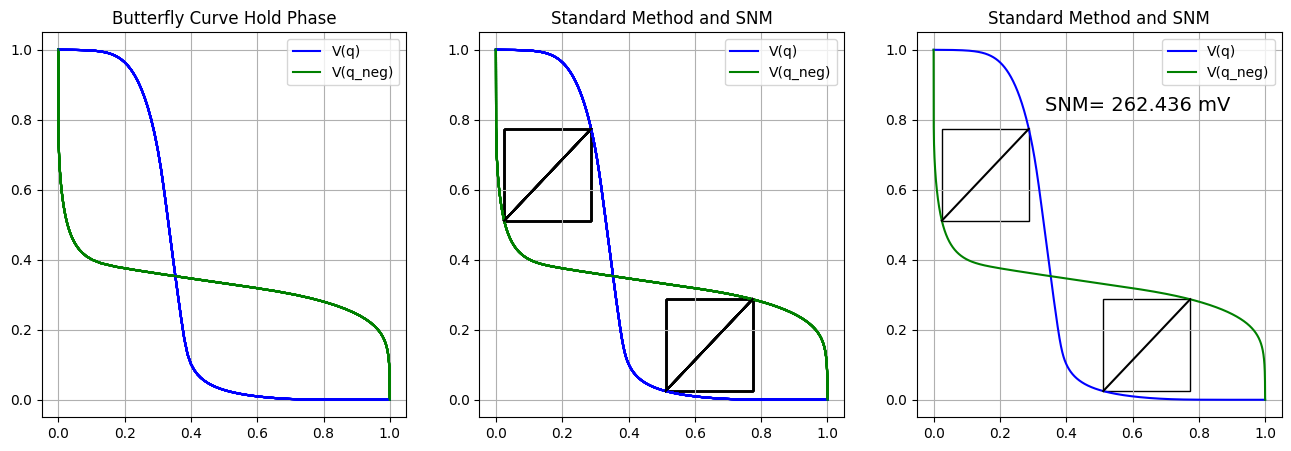

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
x_vq_standard_hold = []
vq_standard_hold = []
x_vqneg_standard_hold = [] 
vqneg_standard_hold = []
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    x_vq_standard_hold.append(x)
    vq_standard_hold.append(vq)
    x_vqneg_standard_hold.append(vq)
    vqneg_standard_hold.append(x)
    axs[0].plot(x, vq, label=steps[step], color='blue')
    axs[0].plot(vq, x, label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Hold Phase")
axs[0].legend(["V(q)", "V(q_neg)"])
axs[0].grid()

# graphical method
print("{:<30} {:<30}".format("w_ax", "SNM(HOLD)"))
snm_standard_hold = []
for w in range(w_ax_range):
    snm_standard_hold_value = graphical_processing(
        x_vq=x_vq_standard_hold[w], 
        vq=vq_standard_hold[w], 
        x_vqneg=x_vqneg_standard_hold[w], 
        vqneg=vqneg_standard_hold[w], 
        ax=axs[1],
        request_text_plot=RequestPlot.FALSE
    )
    snm_standard_hold.append(snm_standard_hold_value)
    print("{:<30} {:<30}".format(w_ax_standard_hold[w], snm_standard_hold_value))

snm_standard_hold_w_ax = graphical_processing(
    x_vq=x_vq_standard_hold[w_ax_pos], 
    vq=vq_standard_hold[w_ax_pos], 
    x_vqneg=x_vqneg_standard_hold[w_ax_pos], 
    vqneg=vqneg_standard_hold[w_ax_pos], 
    ax=axs[2],
    request_text_plot=RequestPlot.TRUE
)
print(f'snm_standard_hold[w_ax_pos={w_ax_standard_hold[w_ax_pos]} u] = {snm_standard_hold_w_ax}')
    
save_image(image_path=os.path.join(images, "butterfly_curve_standard_hold.png"), plt=plt)
plt.show()

File updated successfully: ../../images/snm_standard_hold.png


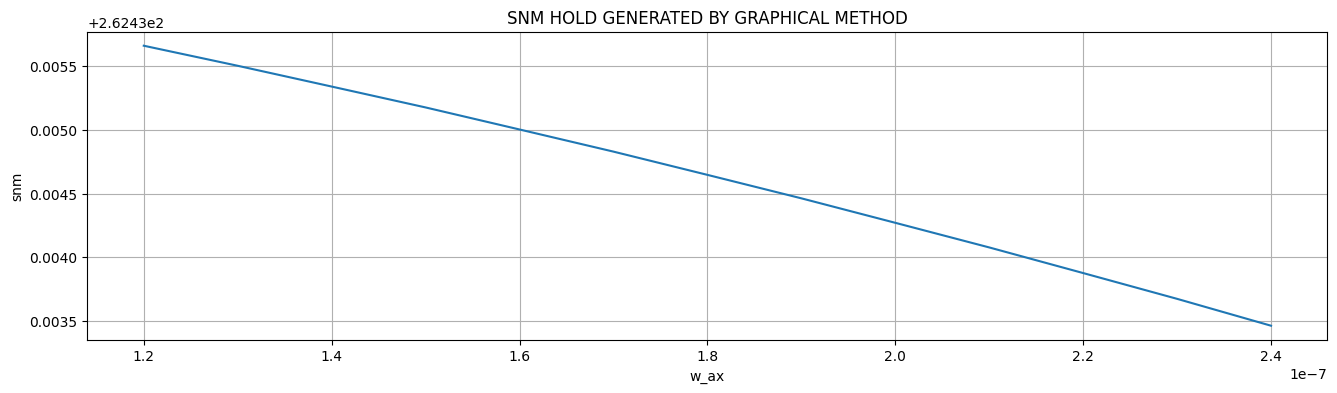

In [6]:
fig_standard_hold = plt.figure(figsize=(16, 4))
plt.plot(w_ax_standard_hold, snm_standard_hold)
plt.ylabel("snm")
plt.xlabel("w_ax")
plt.title("SNM HOLD GENERATED BY GRAPHICAL METHOD")
plt.grid()
save_image(image_path=os.path.join(images, "snm_standard_hold.png"), plt=plt)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/read/standard_read.asc


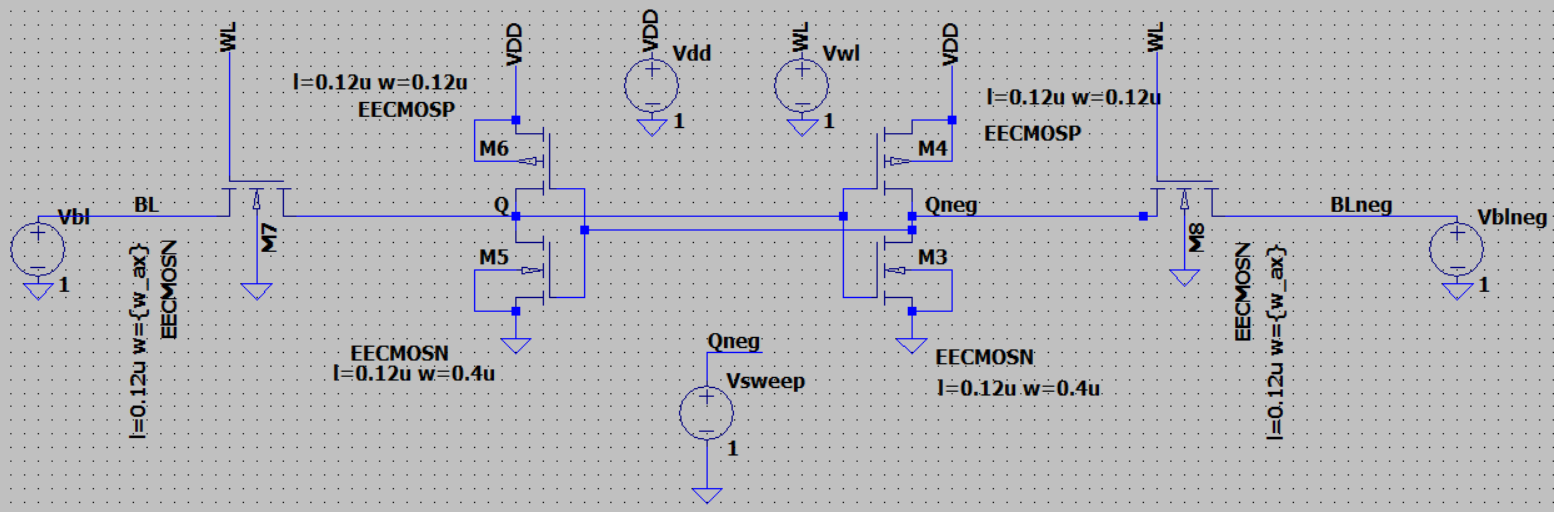

Successful/Total Simulations: 0/1
Raw file: data\standard\read\standard_read_1.raw, Log file: data\standard\read\standard_read_1.log
File opened successfully: data\standard\read\standard_read_1.raw
File updated successfully: ../../images/standard_read_simulation.png


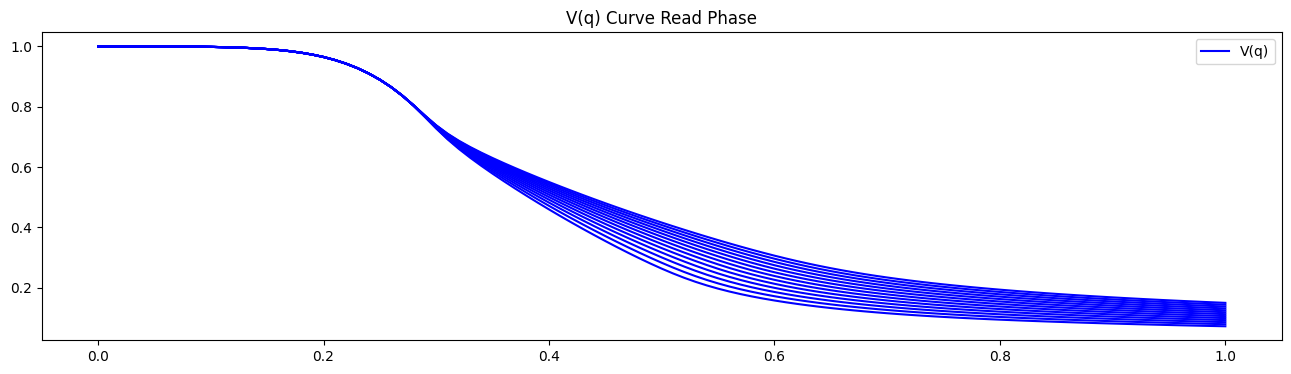

In [7]:
(
    steps, 
    vsweep_standard_read, 
    i_leaks_standard_read, 
    v_q_standard_read, 
    v_q_neg_standard_read,
    v_dd_standard_read,
    v_wl_standard_read,
    v_bl_standard_read,
    v_blneg_standard_read, 
    standard_read_log
) = __init_model__(
    operation_type=OperationType.READ,
    circuit_type=CircuitType.STANDARD, 
    asc_file_path=os.path.join(ltspice, "standard/read/standard_read.asc"),
    schematic_image_path=os.path.join(schematics, "standard.png"),
    request_plot_schematic=RequestPlotSchematic.TRUE,
    vdd=vdd_standard,
    vsweep=vsweep_standard,
    vwl=vwl_read,
    vbl=vbl_read,
    vblneg=vblneg_read,
    params=[rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard]
)

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Read Phase")
plt.legend(["V(q)"])
save_image(image_path=os.path.join(images, "standard_read_simulation.png"), plt=plt)
plt.show()

w_ax_standard_read = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]


Text(0.5, 1.0, 'W AX Trend Read Phase')

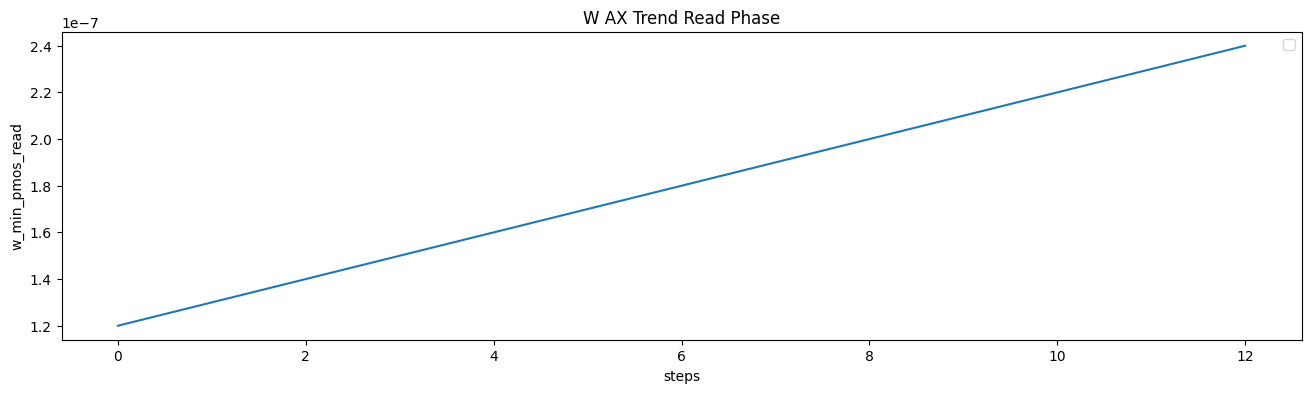

In [8]:
standard_read_log_file_path = f"./{standard_read_log}"

with open(standard_read_log_file_path, "r") as file:
    content = file.read()

w_ax_standard_read = get_data(pattern=w_ax_standard_pattern, content=content)
print(f'w_ax_standard_read = {w_ax_standard_read}')

plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_read'])
plt.plot(w_ax_standard_read, label='w_ax_standard_read')
plt.ylabel('w_min_pmos_read'); plt.xlabel('steps'); plt.title('W AX Trend Read Phase')

w_ax                           SNM(READ)                     
1.2e-07                        150.18932179736015            
1.3e-07                        141.84301463106343            
1.4e-07                        133.79837532531718            
1.5e-07                        126.04461719878147            
1.6e-07                        118.55191413438021            
1.7e-07                        111.31813478480773            
1.8e-07                        104.30266609752346            
1.9e-07                        97.51147039013014             
2e-07                          90.92296793564506             
2.1e-07                        84.55820794965902             
2.2e-07                        78.35772229810932             
2.3e-07                        72.33534210594759             
2.4e-07                        66.5079460850747              
snm_standard_read[w_ax_pos=1.3e-07 u] = 141.84301463106343
File updated successfully: ../../images/butterfly_curve_standard_read.png

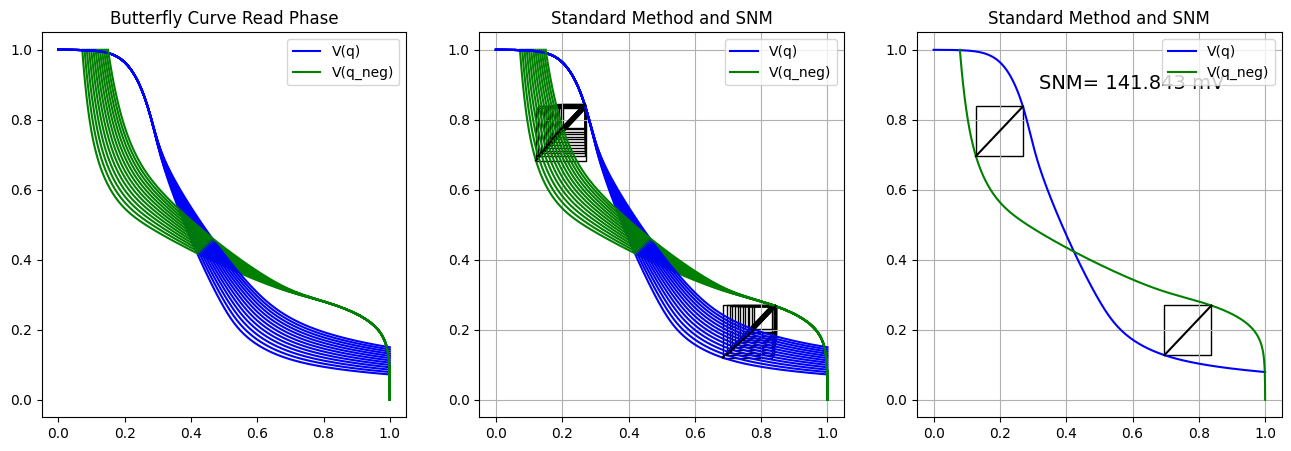

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
x_vq_standard_read = []
vq_standard_read = []
x_vqneg_standard_read = []
vqneg_standard_read = []
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    x_vq_standard_read.append(x)
    vq_standard_read.append(vq)
    x_vqneg_standard_read.append(vq)
    vqneg_standard_read.append(x)
    axs[0].plot(vsweep_standard_read.get_wave(step), v_q_standard_read.get_wave(step), label=steps[step], color='blue')
    axs[0].plot(v_q_standard_read.get_wave(step), vsweep_standard_read.get_wave(step), label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Read Phase")
axs[0].legend(["V(q)", "V(q_neg)"])


# graphical-processing
print("{:<30} {:<30}".format("w_ax", "SNM(READ)"))
snm_standard_read = []
for w in range(w_ax_range):
    snm_standard_read_value = graphical_processing(
        x_vq=x_vq_standard_read[w], 
        vq=vq_standard_read[w], 
        x_vqneg=x_vqneg_standard_read[w], 
        vqneg=vqneg_standard_read[w], 
        ax=axs[1],
        request_text_plot=RequestPlot.FALSE
    )
    snm_standard_read.append(snm_standard_read_value)
    print("{:<30} {:<30}".format(w_ax_standard_read[w], snm_standard_read_value))

snm_standard_read_w_ax = graphical_processing(
    x_vq=x_vq_standard_read[w_ax_pos], 
    vq=vq_standard_read[w_ax_pos], 
    x_vqneg=x_vqneg_standard_read[w_ax_pos], 
    vqneg=vqneg_standard_read[w_ax_pos], 
    ax=axs[2],
    request_text_plot=RequestPlot.TRUE
)
print(f'snm_standard_read[w_ax_pos={w_ax_standard_read[w_ax_pos]} u] = {snm_standard_read_w_ax}')

save_image(image_path=os.path.join(images, "butterfly_curve_standard_read.png"), plt=plt)
plt.show()

File updated successfully: ../../images/snm_standard_read.png


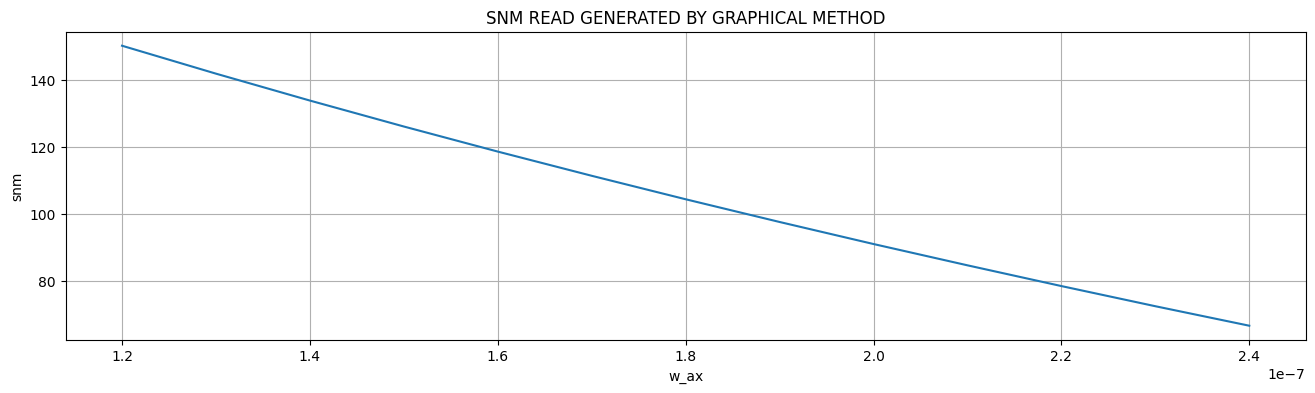

In [10]:
fig_standard_read = plt.figure(figsize=(16, 4))
plt.plot(w_ax_standard_read, snm_standard_read)
plt.ylabel("snm")
plt.xlabel("w_ax")
plt.title("SNM READ GENERATED BY GRAPHICAL METHOD")
plt.grid()
save_image(image_path=os.path.join(images, "snm_standard_read.png"), plt=plt)
plt.show()

<h2>SNM Seevinck Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/hold/seevinck_hold.asc


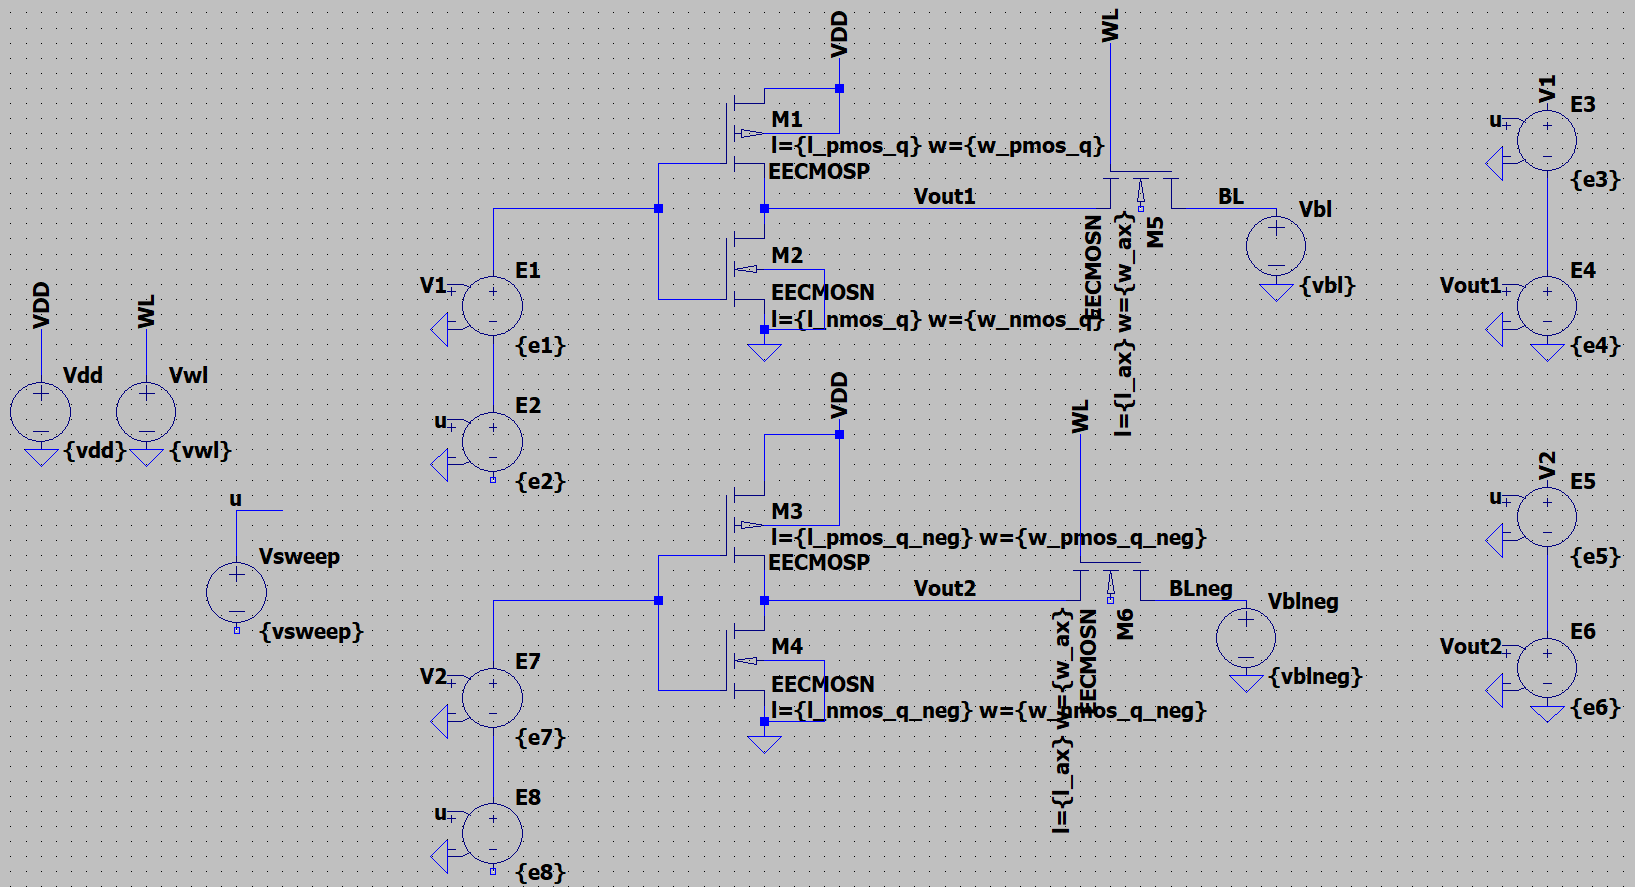

Successful/Total Simulations: 0/1
Raw file: data\seevinck\hold\seevinck_hold_1.raw, Log file: data\seevinck\hold\seevinck_hold_1.log
File opened successfully: data\seevinck\hold\seevinck_hold_1.raw
File updated successfully: ../../images/seevinck_hold_simulation.png


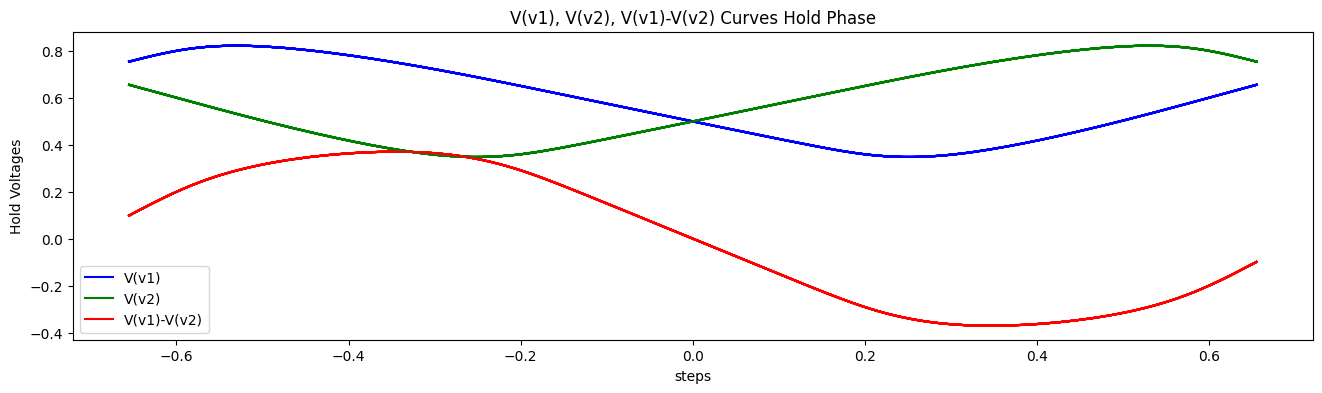

w_ax                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
1.2e-07 u                      261.875 mV                     261.875 mV                    
1.3e-07 u                      261.875 mV                     261.875 mV                    
1.4e-07 u                      261.875 mV                     261.875 mV                    
1.5e-07 u                      261.875 mV                     261.875 mV                    
1.6e-07 u                      261.875 mV                     261.875 mV                    
1.7e-07 u                      261.874 mV                     261.874 mV                    
1.8e-07 u                      261.874 mV                     261.874 mV                    
1.9e-07 u                      261.874 mV                     261.874 mV                    
2e-07 u                        261.874 mV                     261.874 mV                    
2.1e-07 u                      261.874 mV                     261.874 

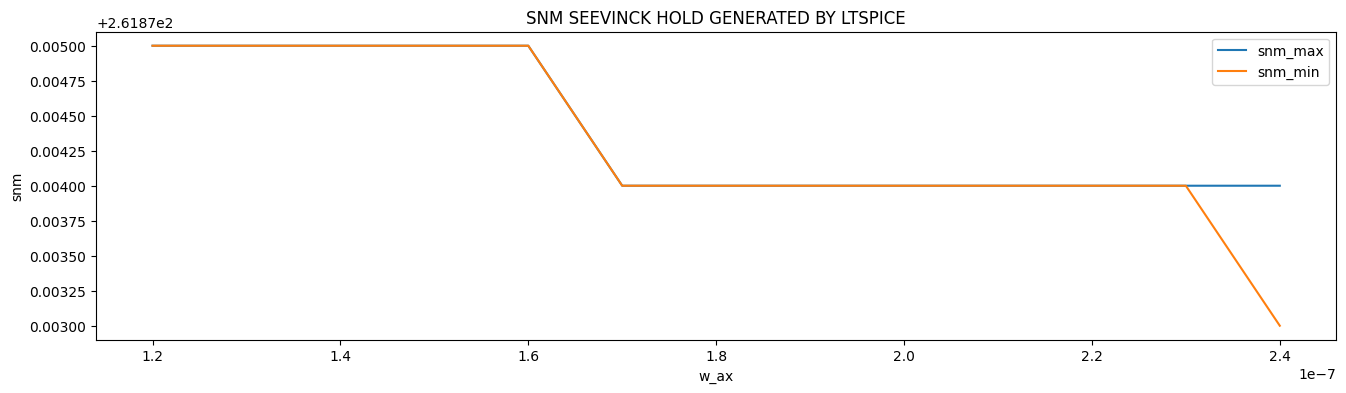

In [11]:
(
    steps, 
    vsweep_seevinck_hold, 
    i_leaks_seevinck_hold, 
    v_1_seevinck_hold, 
    v_2_seevinck_hold,
    v_dd_seevinck_hold,
    v_wl_seevinck_hold,
    v_bl_seevinck_hold,
    v_blneg_seevinck_hold,
    seevinck_hold_log
) = __init_model__(
    operation_type=OperationType.HOLD,
    circuit_type=CircuitType.SEEVINCK, 
    asc_file_path=os.path.join(ltspice, "seevinck/hold/seevinck_hold.asc"),
    schematic_image_path=os.path.join(schematics, "seevinck.png"),
    request_plot_schematic=RequestPlotSchematic.TRUE,
    vdd=vdd_seevinck,
    vsweep=vsweep_seevinck,
    vwl=vwl_hold,
    vbl=vbl_hold,
    vblneg=vblneg_hold,
    params=[rit_models, dc_vsweep_seevinck, snm_max(0.707), snm_min(0.707), w_ax_step_param_seevinck, save_w_ax_seevinck]
)

plt.figure(figsize=(16, 4))
vq_seevinck_hold = []
vqneg_seevinck_hold = []
vq_vqneg_seevinck_hold = []
x_seevinck_hold = []
for step in range(len(steps)):
    vq = v_1_seevinck_hold.get_wave(step)
    vqneg = v_2_seevinck_hold.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_hold.append(vq)
    vqneg_seevinck_hold.append(vqneg)
    vq_vqneg_seevinck_hold.append(vq_minus_vqneg)
    x = vsweep_seevinck_hold.get_wave(step)
    x_seevinck_hold.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
save_image(image_path=os.path.join(images, "seevinck_hold_simulation.png"), plt=plt)
plt.show()


seevinck_hold_log_file_path = f"./{seevinck_hold_log}"
with open(seevinck_hold_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_hold = get_data(pattern=w_ax_seevinck_pattern,  content=content)

snm_max_seevinck_hold = get_data(pattern=snm_max_seevinck_pattern, content=content)
snm_max_seevinck_hold = [1000 * value for value in snm_max_seevinck_hold]

snm_min_seevinck_hold = get_data(pattern=snm_min_seevinck_pattern, content=content)
snm_min_seevinck_hold = [abs(1000 * value) for value in snm_min_seevinck_hold]

print("{:<30} {:<30} {:<30}".format("w_ax", "SNM_MAX(HOLD)", "SNM_MIN(HOLD)"))
for w, smax, smin in zip(w_ax_seevinck_hold, snm_max_seevinck_hold, snm_min_seevinck_hold):
    print("{:<30} {:<30} {:<30}".format(f'{w} u', f'{smax} mV', f'{smin} mV'))

snm_seevinck_hold = []
for snm_max_hold, snm_min_hold in zip(snm_max_seevinck_hold, snm_min_seevinck_hold):
    if snm_max_hold > snm_min_hold:
        snm_seevinck_hold.append(snm_min_hold)
    else:
        snm_seevinck_hold.append(snm_max_hold)

print(f'snm_seevinck_hold[{w_ax_seevinck_hold[w_ax_pos]} u] = {snm_seevinck_hold[w_ax_pos]}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_hold, snm_max_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_min_seevinck_hold)
plt.xlabel("w_ax"); plt.ylabel("snm")
plt.legend(["snm_max","snm_min"])
plt.title("SNM SEEVINCK HOLD GENERATED BY LTSPICE")
save_image(image_path=os.path.join(images, "snm_seevinck_hold_generated_by_ltspice.png"), plt=plt)
plt.show()

w_ax                           snm(hold)_seevinck             snm(hold)_graphical           
1.2e-07                        261.91455154724963             262.0012862542935             
1.3e-07                        261.9144461801283              262.001116570425              
1.4e-07                        261.9143408130071              262.0010216103638             
1.5e-07                        261.9142143724615              262.00077724315554            
1.6e-07                        261.91410900534026             262.0007137737696             
1.7e-07                        261.9139825647947              262.00054476854024            
1.8e-07                        261.9138561242492              262.00030053522585            
1.9e-07                        261.91372968370365             262.0001953495193             
2e-07                          261.91360324315815             262.00002529356846            
2.1e-07                        261.9134768026126              261.9998

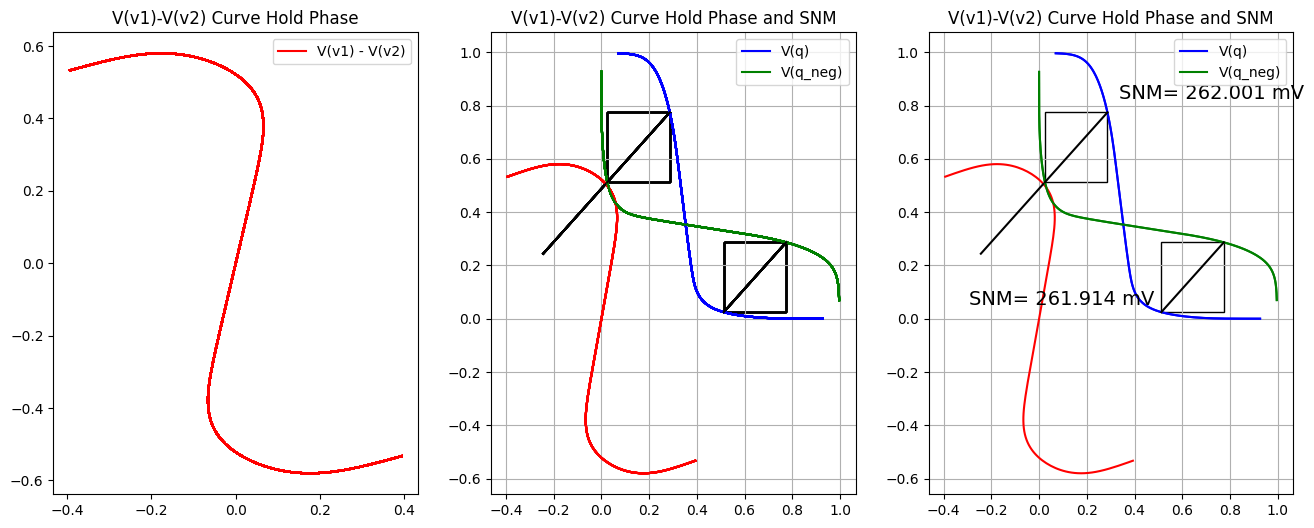

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

snm_seevinck_hold_seevinck_processing = []
snm_seevinck_hold_standard_processing = []


for w in range(w_ax_range):
    
    # vq-vqneg rotating
    for vq_array, vqneg_array in zip(vq_seevinck_hold, vqneg_seevinck_hold):
        vq_vqneg_array = vq_array - vqneg_array
        x_diff, y_diff = rotate_points(x=x_seevinck_hold[w], y=vq_vqneg_array, angle_degrees=-45)
        axs[0].plot(x_diff, y_diff, color='red')
    axs[0].set_title("V(v1)-V(v2) Curve Hold Phase")
    axs[0].legend(["V(v1) - V(v2)"])
    
    # vq and vqneg rotating
    xshold1, yshold1 = rotate_points(x=x_seevinck_hold[w], y=vq_seevinck_hold[w], angle_degrees=-45)
    xshold2, yshold2 = rotate_points(x=x_seevinck_hold[w], y=vqneg_seevinck_hold[w], angle_degrees=-45)
    axs[1].plot(xshold1, yshold1, color='blue')
    axs[1].plot(xshold2, yshold2, color='green')


    # seevinck processing
    snm_seevinck_hold_seevinck_processing_value = seevinck_processing(
        x_v1_minus_v2=x_seevinck_hold[w], 
        v1_minus_v2=vq_vqneg_seevinck_hold[w], 
        ax=axs[1],
        request_text_plot=RequestPlot.FALSE
    )
    snm_seevinck_hold_seevinck_processing.append(snm_seevinck_hold_seevinck_processing_value)


    # graphical-processing
    snm_seevinck_hold_standard_processing_value = graphical_processing(
        x_vq=xshold1, 
        vq=yshold1, 
        x_vqneg=xshold2, 
        vqneg=yshold2, 
        ax=axs[1],
        request_text_plot=RequestPlot.FALSE
    )
    snm_seevinck_hold_standard_processing.append(snm_seevinck_hold_standard_processing_value)

axs[1].set_title("V(v1)-V(v2) Curve Hold Phase and SNM")
axs[1].grid()



# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_hold, vqneg_seevinck_hold):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vq_vqneg_array, angle_degrees=-45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[2].set_title("V(v1)-V(v2) Curve Hold Phase")
axs[2].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xshold1, yshold1 = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vq_seevinck_hold[w_ax_pos], angle_degrees=-45)
xshold2, yshold2 = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vqneg_seevinck_hold[w_ax_pos], angle_degrees=-45)
axs[2].plot(xshold1, yshold1, color='blue')
axs[2].plot(xshold2, yshold2, color='green')

# seevinck processing
snm_seevinck_hold_seevinck_processing_w_ax = seevinck_processing(
    x_v1_minus_v2=x_seevinck_hold[w_ax_pos], 
    v1_minus_v2=vq_vqneg_seevinck_hold[w_ax_pos], 
    ax=axs[2],
    request_text_plot=RequestPlot.TRUE
)

# graphical-processing
snm_seevinck_hold_standard_processing_w_ax = graphical_processing(
    x_vq=xshold1, 
    vq=yshold1, 
    x_vqneg=xshold2, 
    vqneg=yshold2, 
    ax=axs[2],
    request_text_plot=RequestPlot.TRUE
)

axs[2].set_title("V(v1)-V(v2) Curve Hold Phase and SNM")
axs[2].grid()


print("{:<30} {:<30} {:<30}".format("w_ax", "snm(hold)_seevinck", "snm(hold)_graphical"))
for w, snm_hold_seevinck, snm_hold_graphical in zip(w_ax_seevinck_hold, snm_seevinck_hold_seevinck_processing, snm_seevinck_hold_standard_processing):
    print("{:<30} {:<30} {:<30}".format(w, snm_hold_seevinck, snm_hold_graphical))

save_image(image_path=os.path.join(images, "v1_minus_v2_seevinck_hold.png"), plt=plt)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/read/seevinck_read.asc


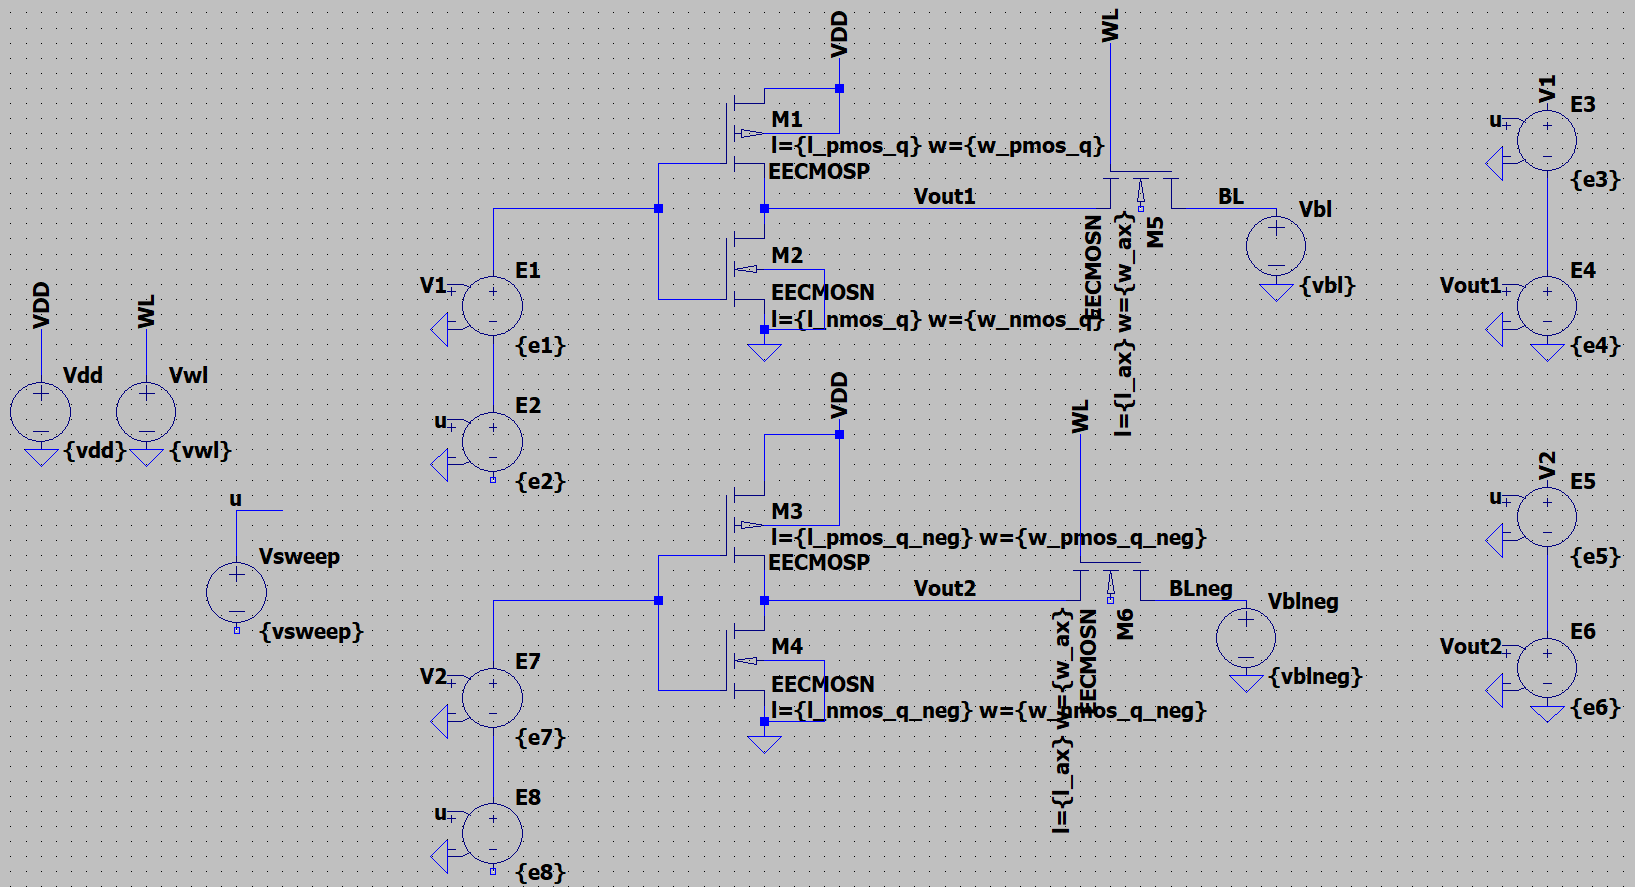

Successful/Total Simulations: 0/1
Raw file: data\seevinck\read\seevinck_read_1.raw, Log file: data\seevinck\read\seevinck_read_1.log
File opened successfully: data\seevinck\read\seevinck_read_1.raw
File updated successfully: ../../images/seevinck_read_simulation.png


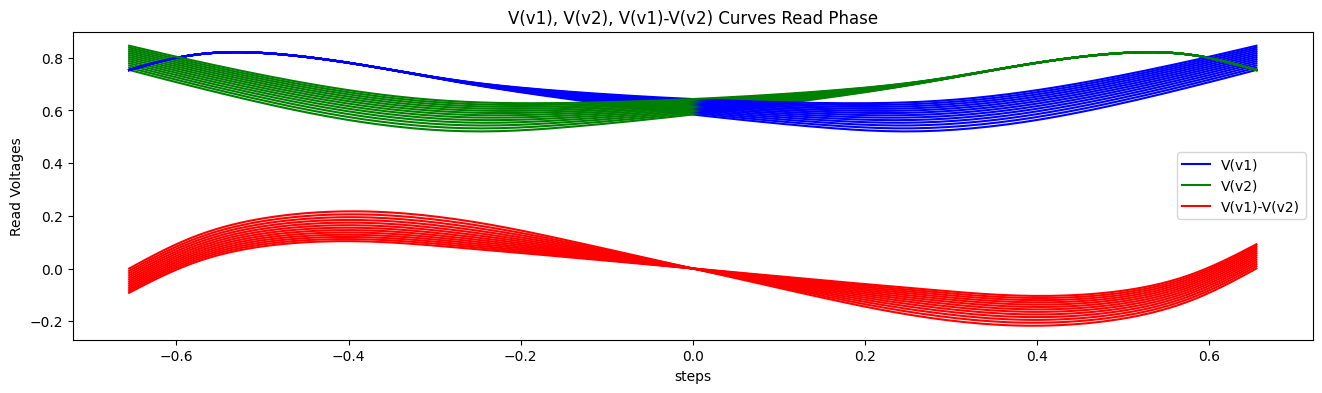

w_ax                 SNM_MAX(READ)                  SNM_MIN(READ)                 
1.2e-07 u            142.214 mV                     142.214 mV                    
1.3e-07 u            134.805 mV                     134.805 mV                    
1.4e-07 u            127.66900000000001 mV          127.66900000000001 mV         
1.5e-07 u            120.78899999999999 mV          120.78899999999999 mV         
1.6e-07 u            114.14699999999999 mV          114.14699999999999 mV         
1.7e-07 u            107.742 mV                     107.742 mV                    
1.8e-07 u            101.551 mV                     101.551 mV                    
1.9e-07 u            95.5539 mV                     95.5539 mV                    
2e-07 u              89.7406 mV                     89.7406 mV                    
2.1e-07 u            84.10130000000001 mV           84.1012 mV                    
2.2e-07 u            78.6269 mV                     78.6269 mV                    
2.3e

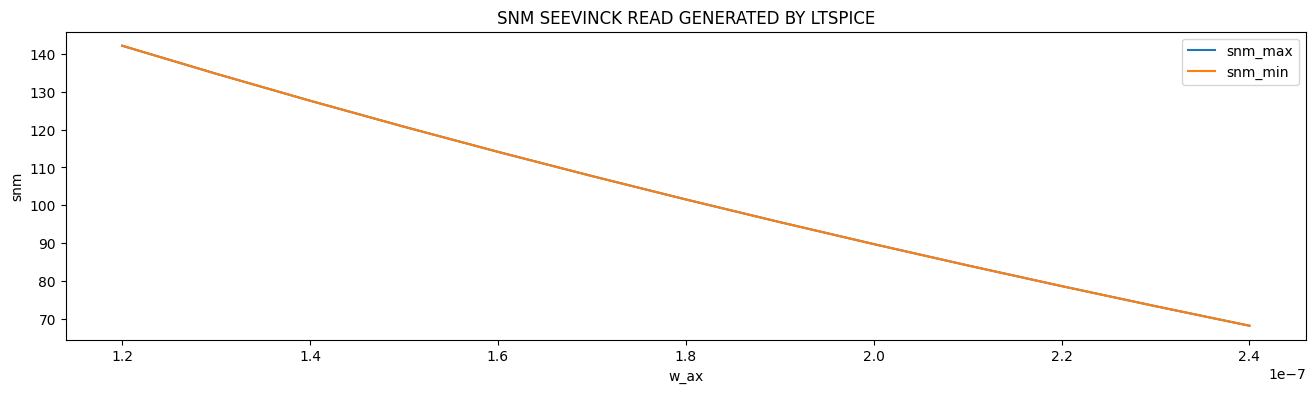

In [13]:
(
    steps, 
    vsweep_seevinck_read, 
    i_leaks_seevinck_read, 
    v_1_seevinck_read, 
    v_2_seevinck_read,
    v_dd_seevinck_read,
    v_wl_seevinck_read,
    v_bl_seevinck_read,
    v_blneg_seevinck_read, 
    seevinck_read_log
) = __init_model__(
    operation_type=OperationType.READ,
    circuit_type=CircuitType.SEEVINCK, 
    asc_file_path=os.path.join(ltspice, "seevinck/read/seevinck_read.asc"),
    schematic_image_path=os.path.join(schematics, "seevinck.png"),
    request_plot_schematic=RequestPlotSchematic.TRUE,
    vdd=vdd_seevinck,
    vsweep=vsweep_seevinck,
    vwl=vwl_read,
    vbl=vbl_read,
    vblneg=vblneg_read,
    params=[rit_models, dc_vsweep_seevinck, snm_max(0.655), snm_min(0.655), w_ax_step_param_seevinck, save_w_ax_seevinck]
)

plt.figure(figsize=(16, 4))
vq_seevinck_read = []
vqneg_seevinck_read = []
vq_vqneg_seevinck_read = []
x_seevinck_read = []
for step in range(len(steps)):
    vq = v_1_seevinck_read.get_wave(step)
    vqneg = v_2_seevinck_read.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_read.append(vq)
    vqneg_seevinck_read.append(vqneg)
    vq_vqneg_seevinck_read.append(vq_minus_vqneg)
    x = vsweep_seevinck_read.get_wave(step)
    x_seevinck_read.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
save_image(image_path=os.path.join(images, "seevinck_read_simulation.png"), plt=plt)
plt.show()


seevinck_read_log_file_path = f"./{seevinck_read_log}"
with open(seevinck_read_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_read = get_data(pattern=w_ax_seevinck_pattern, content=content)

snm_max_seevinck_read = get_data(pattern=snm_max_seevinck_pattern, content=content)
snm_max_seevinck_read = [1000 * value for value in snm_max_seevinck_read]

snm_min_seevinck_read = get_data(pattern=snm_min_seevinck_pattern, content=content)
snm_min_seevinck_read = [abs(1000 * value) for value in snm_min_seevinck_read]

print("{:<20} {:<30} {:<30}".format("w_ax", "SNM_MAX(READ)", "SNM_MIN(READ)"))
for w, smax, smin in zip(w_ax_seevinck_read, snm_max_seevinck_read, snm_min_seevinck_read):
    print("{:<20} {:<30} {:<30}".format(f'{w} u', f'{smax} mV', f'{smin} mV'))
    
snm_seevinck_read = []
for snm_max_read, snm_min_read in zip(snm_max_seevinck_read, snm_min_seevinck_read):
    if snm_max_read > snm_min_read:
        snm_seevinck_read.append(snm_min_read)
    else:
        snm_seevinck_read.append(snm_max_read)

print(f'snm_seevinck_read[{w_ax_seevinck_read[w_ax_pos]} u] = {snm_seevinck_read[w_ax_pos]}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_read, snm_max_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_min_seevinck_read)
plt.xlabel("w_ax"); plt.ylabel("snm")
plt.legend(["snm_max","snm_min"])
plt.title("SNM SEEVINCK READ GENERATED BY LTSPICE")
save_image(image_path=os.path.join(images, "snm_seevinck_read_generated_by_ltspice.png"), plt=plt)
plt.show()

w_ax                           snm(read)_seevinck             snm(read)_graphical           
1.2e-07                        153.5277350147545              153.5838659268225             
1.3e-07                        145.52864248902344             145.59288008619802            
1.4e-07                        137.82580016147543             137.90174754200393            
1.5e-07                        130.39826104840057             130.48844671822306            
1.6e-07                        123.22760697699961             123.32787930532943            
1.7e-07                        116.3128685697568              116.41411045769094            
1.8e-07                        109.62938992029328             109.71780878846023            
1.9e-07                        103.1554654016259              103.22632358485816            
2e-07                          96.87971536465676              96.93327152386865             
2.1e-07                        90.79172953780365              90.82042

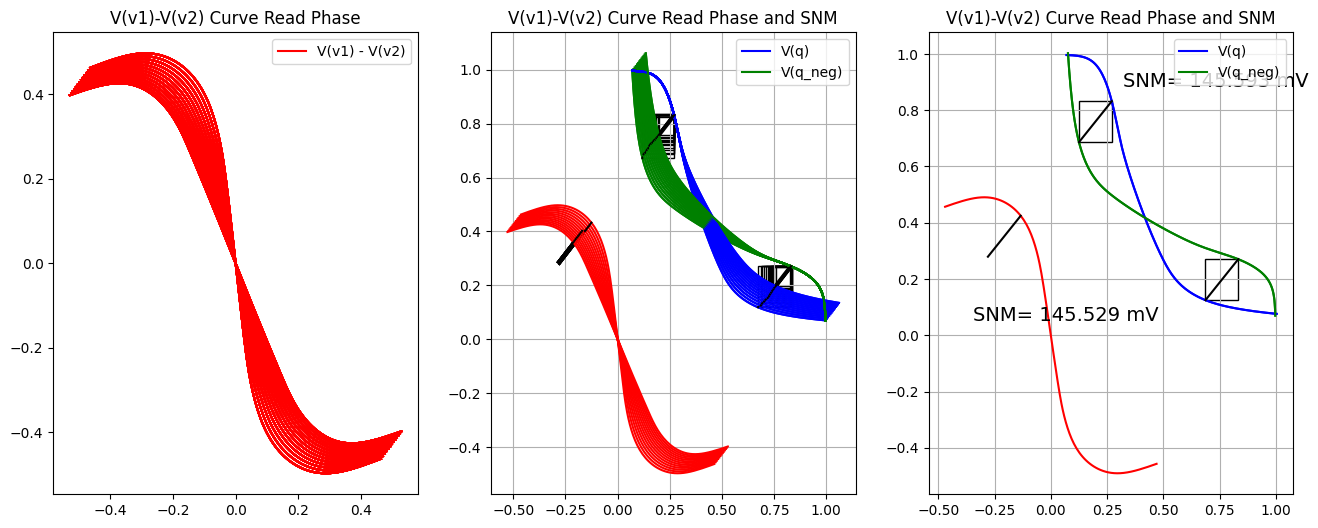

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

snm_seevinck_read_seevinck_processing = []
snm_seevinck_read_standard_processing = []


for w in range(w_ax_range):
    
    # vq-vqneg rotating
    for vq_array, vqneg_array in zip(vq_seevinck_read, vqneg_seevinck_read):
        vq_vqneg_array = vq_array - vqneg_array
        x_diff, y_diff = rotate_points(x=x_seevinck_read[w], y=vq_vqneg_array, angle_degrees=-45)
        axs[0].plot(x_diff, y_diff, color='red')
    axs[0].set_title("V(v1)-V(v2) Curve Read Phase")
    axs[0].legend(["V(v1) - V(v2)"])
    
    # vq and vqneg rotating
    xsread1, ysread1 = rotate_points(x=x_seevinck_read[w], y=vq_seevinck_read[w], angle_degrees=-45)
    xsread2, ysread2 = rotate_points(x=x_seevinck_read[w], y=vqneg_seevinck_read[w], angle_degrees=-45)
    axs[1].plot(xsread1, ysread1, color='blue')
    axs[1].plot(xsread2, ysread2, color='green')


    # seevinck processing
    snm_seevinck_read_seevinck_processing_value = seevinck_processing(
        x_v1_minus_v2=x_seevinck_read[w], 
        v1_minus_v2=vq_vqneg_seevinck_read[w], 
        ax=axs[1],
        request_text_plot=RequestPlot.FALSE
    )
    snm_seevinck_read_seevinck_processing.append(snm_seevinck_read_seevinck_processing_value)


    # graphical-processing
    snm_seevinck_read_standard_processing_value = graphical_processing(
        x_vq=xsread1, 
        vq=ysread1, 
        x_vqneg=xsread2, 
        vqneg=ysread2, 
        ax=axs[1],
        request_text_plot=RequestPlot.FALSE
    )
    snm_seevinck_read_standard_processing.append(snm_seevinck_read_standard_processing_value)

axs[1].set_title("V(v1)-V(v2) Curve Read Phase and SNM")
axs[1].grid()



# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_read, vqneg_seevinck_read):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x=x_seevinck_read[w_ax_pos], y=vq_vqneg_array, angle_degrees=-45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[2].set_title("V(v1)-V(v2) Curve Read Phase")
axs[2].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xsread1, ysread1 = rotate_points(x=x_seevinck_read[w_ax_pos], y=vq_seevinck_read[w_ax_pos], angle_degrees=-45)
xsread2, ysread2 = rotate_points(x=x_seevinck_read[w_ax_pos], y=vqneg_seevinck_read[w_ax_pos], angle_degrees=-45)
axs[2].plot(xsread1, ysread1, color='blue')
axs[2].plot(xsread2, ysread2, color='green')

# seevinck processing
snm_seevinck_read_seevinck_processing_w_ax = seevinck_processing(
    x_v1_minus_v2=x_seevinck_read[w_ax_pos], 
    v1_minus_v2=vq_vqneg_seevinck_read[w_ax_pos], 
    ax=axs[2],
    request_text_plot=RequestPlot.TRUE
)

# graphical-processing
snm_seevinck_read_standard_processing_w_ax = graphical_processing(
    x_vq=xsread1, 
    vq=ysread1, 
    x_vqneg=xsread2, 
    vqneg=ysread2, 
    ax=axs[2],
    request_text_plot=RequestPlot.TRUE
)

axs[2].set_title("V(v1)-V(v2) Curve Read Phase and SNM")
axs[2].grid()


print("{:<30} {:<30} {:<30}".format("w_ax", "snm(read)_seevinck", "snm(read)_graphical"))
for w, snm_read_seevinck, snm_read_graphical in zip(w_ax_seevinck_read, snm_seevinck_read_seevinck_processing, snm_seevinck_read_standard_processing):
    print("{:<30} {:<30} {:<30}".format(w, snm_read_seevinck, snm_read_graphical))

save_image(image_path=os.path.join(images, "v1_minus_v2_seevinck_read.png"), plt=plt)
plt.show()

<h3>Comparative Analysis between Graphical Method and Seevinck Method</h3>

w_ax [u]             %difference snm(hold) [%]      %difference snm(read) [%]     
1.2e-07              0.2138665068012                5.4550144973299375            
1.3e-07              0.21380640888755423            5.088064442066778             
1.4e-07              0.21374413396272512            4.688443686475999             
1.5e-07              0.2136815497218566             4.258429024721536             
1.6e-07              0.21361548545146747            3.7859344129439707            
1.7e-07              0.21393099244212097            3.2649799912893442            
1.8e-07              0.2138613333286962             2.673419570016158             
1.9e-07              0.21379102208214912            2.0278834947711766            
2e-07                0.2137176589027743             1.3089168437836205            
2.1e-07              0.21364385106819386            0.5419299821038406            
2.2e-07              0.21356703652600098            0.34293512058719045           
2.3e

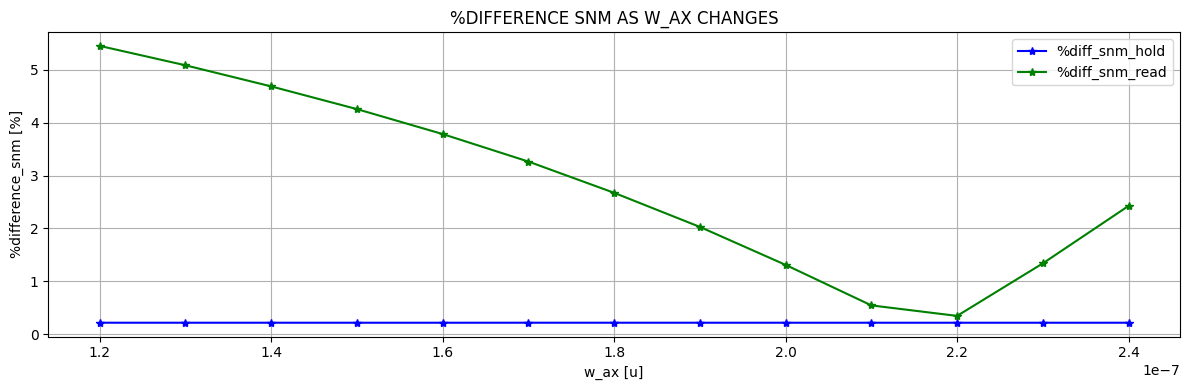

In [15]:
w_ax_hold = w_ax_standard_hold
print("{:<20} {:<30} {:<30}".format("w_ax [u]", "%difference snm(hold) [%]", "%difference snm(read) [%]"))
percentage_difference_snm_hold = []
percentage_difference_snm_read = []
for w_ax, s11, s21, s12, s22 in zip(w_ax_hold, snm_standard_hold, snm_standard_read, snm_seevinck_hold, snm_seevinck_read):
    percentage_difference_snm_hold_value = (abs(s11-s12) / ((s11+s12)/2)) * 100
    percentage_difference_snm_read_value = (abs(s21-s22) / ((s21+s22)/2)) * 100
    percentage_difference_snm_hold.append(percentage_difference_snm_hold_value)
    percentage_difference_snm_read.append(percentage_difference_snm_read_value)
    print("{:<20} {:<30} {:<30}".format(f'{w_ax}', f'{percentage_difference_snm_hold_value}', f'{percentage_difference_snm_read_value}'))

fig_percentage_difference_comparative_analysis = plt.figure(figsize=(12, 4))
plt.plot(w_ax_hold, percentage_difference_snm_hold, '-*', label='diff_snm_hold', color='blue')
plt.plot(w_ax_hold, percentage_difference_snm_read, '-*', label='diff_snm_read', color='green')
plt.ylabel('%difference_snm [%]')
plt.xlabel('w_ax [u]')
plt.legend(['%diff_snm_hold', '%diff_snm_read'])
plt.title('%DIFFERENCE SNM AS W_AX CHANGES')
plt.tight_layout()
plt.grid()
save_image(image_path=os.path.join(images, "difference_snm_w_ax.png"), plt=plt)
plt.show()

<h2>Gaussian VTH DC Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

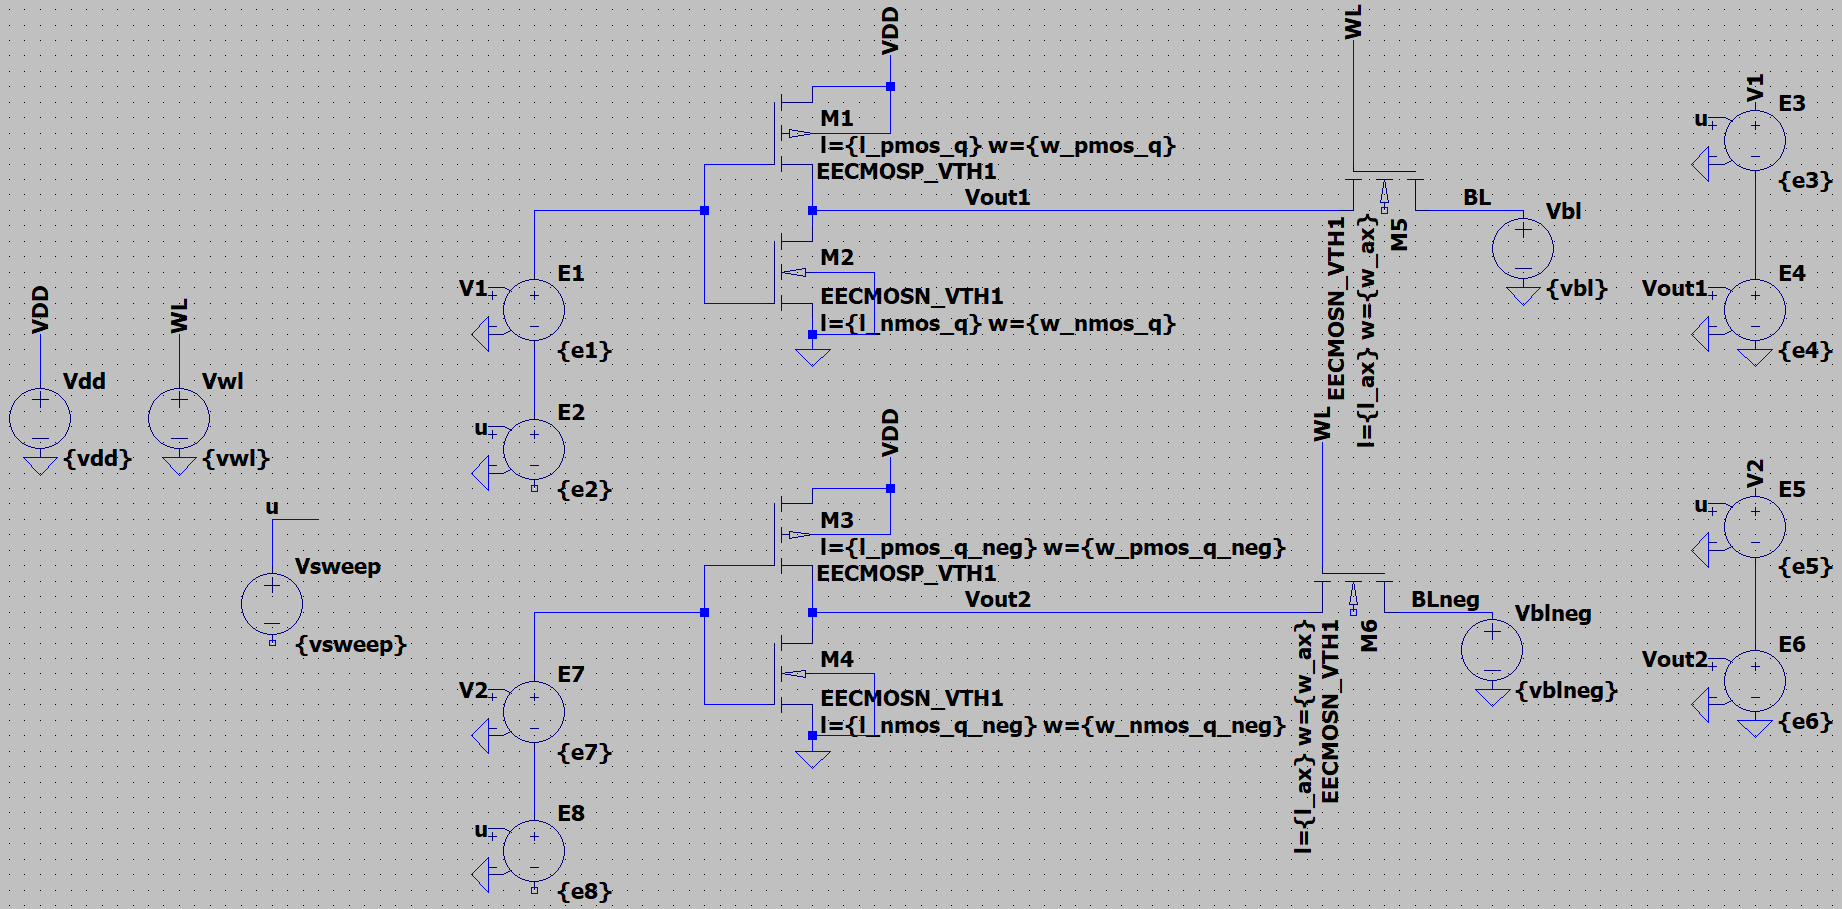

VDD Scaling Initialised
****************************************************************************************************************
vdd = 1.0 V
File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw
snm_mean_gaussian_vth_hold = 259.9041775 mV
snm_stdev_gaussian_vth_hold = 25.20835427689335 mV
****************************************************************************************************************
vdd = 0.95 V
File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw
snm_mean_gau

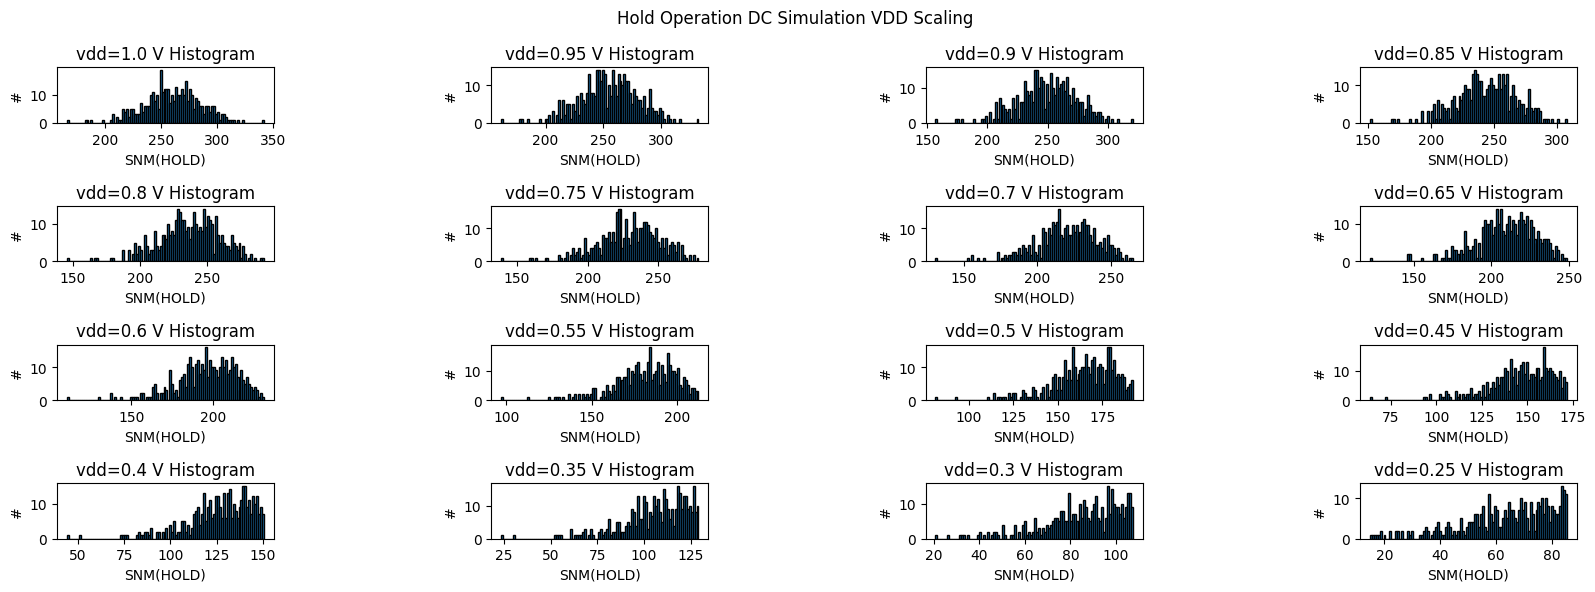

In [6]:
schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
display(Image(schematic_image_path))

iterations_scaling = 16
rows = round(int(np.sqrt(iterations_scaling)))
tmp = iterations_scaling % rows
iterations = iterations_scaling
if tmp == 1:
    iterations = iterations_scaling + (rows-1)
elif tmp == 2:
    iterations = iterations_scaling + (rows-2)
cols = int(iterations / rows)
fig_hold_snm, axs_hold_snm = plt.subplots(rows, cols, figsize=(16, 6))
plt.suptitle("Hold Operation DC Simulation VDD Scaling")
vdd_start = 1.0
vdd_stop = vdd_start - (iterations / 10)
vdd_step = 0.05
print('VDD Scaling Initialised')
row = 0
col = 0
vdd_gaussian_vth_scaled = []
snm_gaussian_vth_hold_mean = []
snm_gaussian_vth_hold_stdev = []
for scaling in np.arange(vdd_start, vdd_stop, -vdd_step):
    if row == rows:
        break
    vdd_scaled = round(scaling, 2)
    vdd_gaussian_vth_scaled.append(vdd_scaled)
    print('****************************************************************************************************************')
    print(f'vdd = {vdd_scaled} V')
    (
        steps, 
        vsweep_gaussian_vth_hold, 
        i_leaks_gaussian_vth_hold, 
        v_1_gaussian_vth_hold, 
        v_2_gaussian_vth_hold,
        v_dd_gaussian_vth_hold,
        v_wl_gaussian_vth_hold,
        v_bl_gaussian_vth_hold,
        v_blneg_gaussian_vth_hold, 
        gaussian_vth_hold_log
    ) = __init_model__(
        operation_type=OperationType.HOLD,
        circuit_type=CircuitType.GAUSSIAN_VTH_DC, 
        asc_file_path=os.path.join(ltspice, "gaussian-vth/hold/gaussian_vth_hold.asc"),
        schematic_image_path=os.path.join(schematics, "gaussian_vth.png"),
        request_plot_schematic=RequestPlotSchematic.FALSE,
        vdd=f'{vdd_scaled}',
        vsweep=vsweep_gaussian_vth,
        vwl=vwl_hold,
        vbl=f'{vdd_scaled}',
        vblneg=f'{vdd_scaled}',
        params=[rit_models_montecarlo, dc_vsweep_gaussian_vth(-0.707*scaling, 0.707*scaling, 0.01), step_param_run_gaussian_vth, snm_max(0.707), snm_min(0.707)]
    )
    
    vq_gaussian_vth_hold = []
    vqneg_gaussian_vth_hold = []
    vq_vqneg_gaussian_vth_hold = []
    x_gaussian_vth_hold = []
    
    
    for step in range(len(steps)):
        
        vq = v_1_gaussian_vth_hold.get_wave(step)
        vq_gaussian_vth_hold.append(vq)
        vqneg = v_2_gaussian_vth_hold.get_wave(step)
        vqneg_gaussian_vth_hold.append(vqneg)
        vq_minus_vqneg = vq - vqneg
        vq_vqneg_gaussian_vth_hold.append(vq_minus_vqneg)
        x = vsweep_gaussian_vth_hold.get_wave(step)
        x_gaussian_vth_hold.append(x)
        
        
    gaussian_vth_hold_log_file_path = f"./{gaussian_vth_hold_log}"
    with open(gaussian_vth_hold_log_file_path, "r") as file:
        content = file.read()
    
    snm_max_gaussian_vth_hold = get_data(pattern=snm_max_seevinck_pattern, content=content)
    snm_max_gaussian_vth_hold = [1000 * value for value in snm_max_gaussian_vth_hold]
     
    snm_min_gaussian_vth_hold = get_data(pattern=snm_min_seevinck_pattern, content=content)
    snm_min_gaussian_vth_hold = [abs(1000 * value) for value in snm_min_gaussian_vth_hold]
    
    snm_hold = []
    for snm_max_hold, snm_min_hold in zip(snm_max_gaussian_vth_hold, snm_min_gaussian_vth_hold):
        if snm_max_hold > snm_min_hold:
            snm_hold.append(snm_min_hold)
        else:
            snm_hold.append(snm_max_hold)
    
    snm_gaussian_vth_hold_file_path = "snm_hold"
    vdd_scaled_str = str(vdd_scaled).replace('.', '')
    if vdd_scaled==1:
        vdd_scaled_str = '1'
    snm_gaussian_vth_hold_file_path = os.path.join(f'{data}/out/hold/snm', snm_gaussian_vth_hold_file_path + '_' + vdd_scaled_str + '.txt')
    with open(snm_gaussian_vth_hold_file_path, 'w') as file:
        for val in snm_hold:
            file.write(f'{val}\n')
    
    axs_hold_snm[row, col].hist(snm_hold, bins=100, edgecolor='black')
    axs_hold_snm[row, col].set_xlabel("SNM(HOLD)")
    axs_hold_snm[row, col].set_ylabel("#")
    axs_hold_snm[row, col].set_title(f"vdd={vdd_scaled} V Histogram")
    
    snm_mean = mean(snm_hold)
    snm_stdev = stdev(snm_hold)
    snm_gaussian_vth_hold_mean.append(snm_mean)
    snm_gaussian_vth_hold_stdev.append(snm_stdev)
    print(f'snm_mean_gaussian_vth_hold = {snm_mean} mV')
    print(f'snm_stdev_gaussian_vth_hold = {snm_stdev} mV')
    
    
    if col == (cols-1):
        row = row + 1
        col = 0
    else:
        col = col + 1   

plt.tight_layout()
plt.subplots_adjust(hspace=1.5, wspace=1)
save_image(image_path=os.path.join(images, "hold_operation_dc_vdd_scaling.png"), plt=plt)
plt.show()

<h3>Read Phase SRAM 6T</h3>

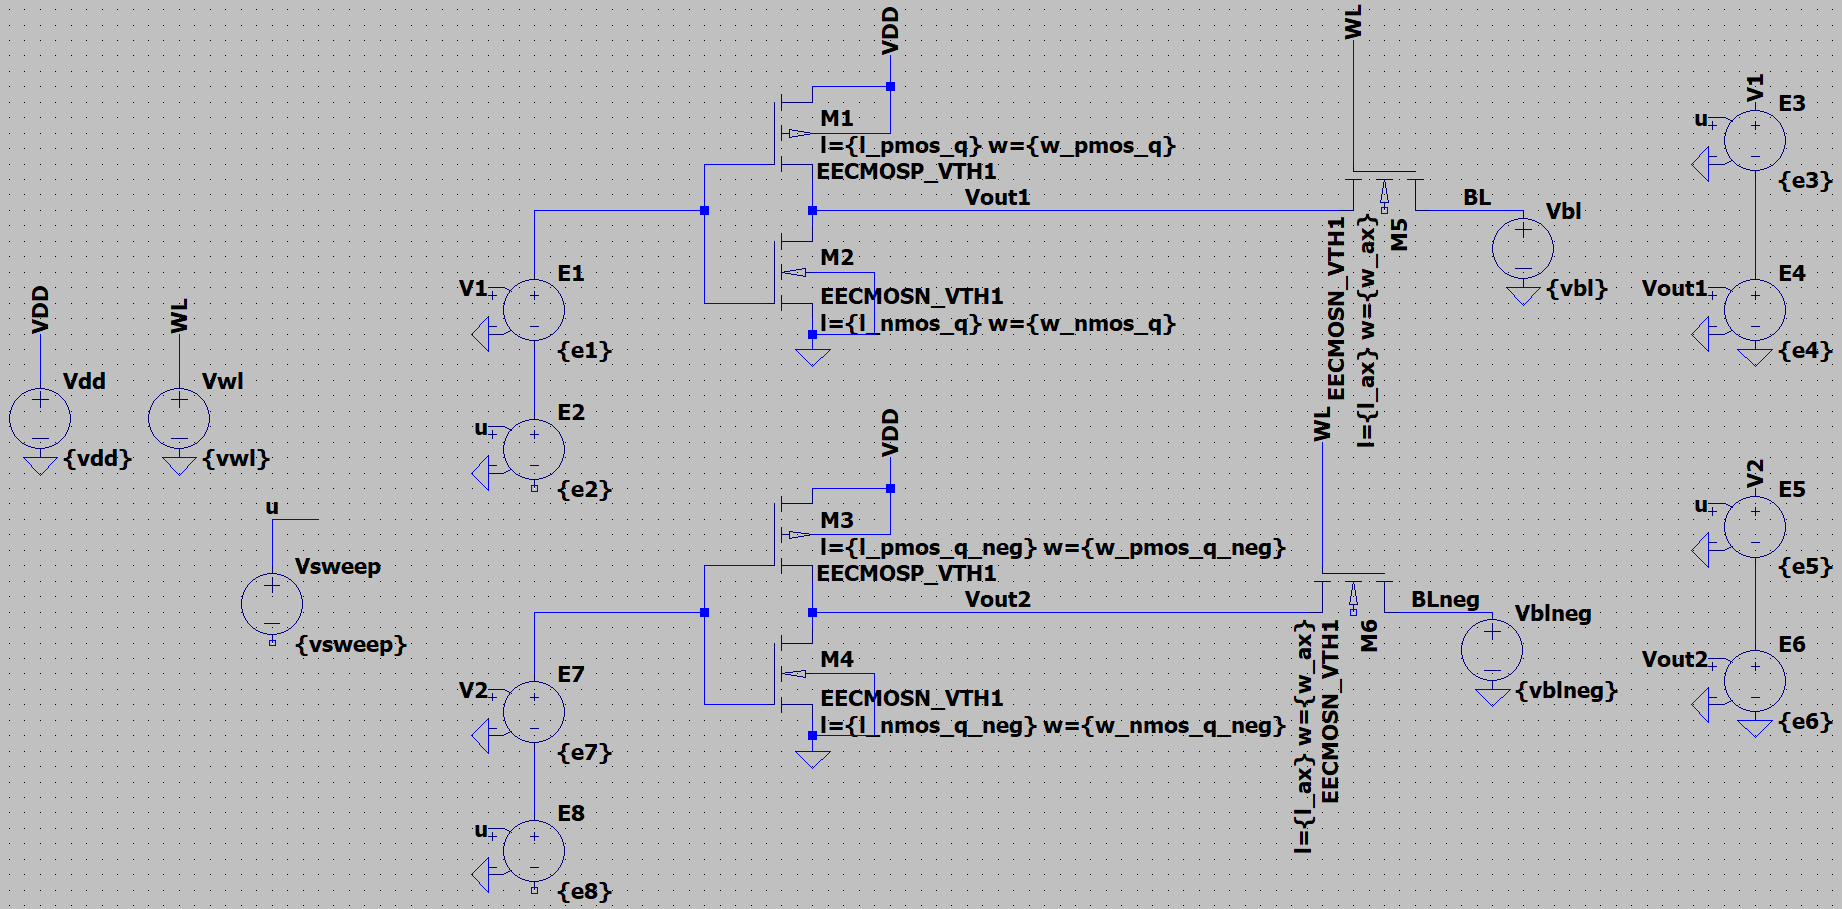

VDD Scaling Initialised
****************************************************************************************************************
vdd = 1.0 V
File opened successfully: ../../ltspice/models/gaussian-vth/read/gaussian_vth_read.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\read\gaussian_vth_read_1.raw, Log file: data\gaussian-vth\read\gaussian_vth_read_1.log
File opened successfully: data\gaussian-vth\read\gaussian_vth_read_1.raw
snm_mean_gaussian_vth_read = 143.85150625 mV
snm_stdev_gaussian_vth_read = 24.79038651959795 mV
****************************************************************************************************************
vdd = 0.95 V
File opened successfully: ../../ltspice/models/gaussian-vth/read/gaussian_vth_read.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\read\gaussian_vth_read_1.raw, Log file: data\gaussian-vth\read\gaussian_vth_read_1.log
File opened successfully: data\gaussian-vth\read\gaussian_vth_read_1.raw
snm_mean_ga

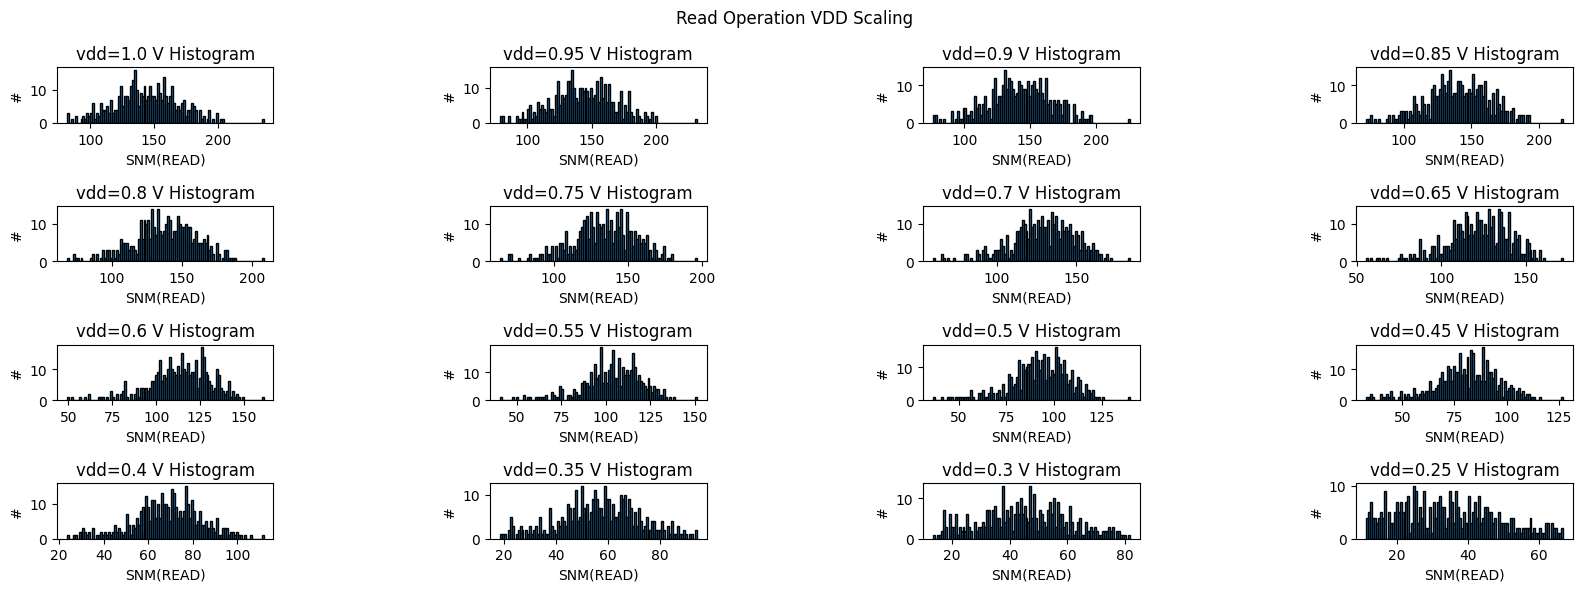

In [17]:
schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
display(Image(schematic_image_path))

iterations_scaling = 16
rows = round(int(np.sqrt(iterations_scaling)))
tmp = iterations_scaling % rows
iterations = iterations_scaling
if tmp == 1:
    iterations = iterations_scaling + (rows-1)
elif tmp == 2:
    iterations = iterations_scaling + (rows-2)
cols = int(iterations / rows)
fig, axs = plt.subplots(rows, cols, figsize=(16, 6))
plt.suptitle("Read Operation VDD Scaling")
vdd_start = 1.0
vdd_stop = vdd_start - (iterations / 10)
vdd_step = 0.05
print('VDD Scaling Initialised')
row = 0
col = 0
vdd_gaussian_vth_scaled = []
snm_gaussian_vth_read_mean = []
snm_gaussian_vth_read_stdev = []
for scaling in np.arange(vdd_start, vdd_stop, -vdd_step):
    if row == rows:
        break
    vdd_scaled = round(scaling, 2)
    vdd_gaussian_vth_scaled.append(vdd_scaled)
    print('****************************************************************************************************************')
    print(f'vdd = {vdd_scaled} V')
    (
        steps, 
        vsweep_gaussian_vth_read, 
        i_leaks_gaussian_vth_read, 
        v_1_gaussian_vth_read, 
        v_2_gaussian_vth_read,
        v_dd_gaussian_vth_read,
        v_wl_gaussian_vth_read,
        v_bl_gaussian_vth_read,
        v_blneg_gaussian_vth_read, 
        gaussian_vth_read_log
    ) = __init_model__(
        operation_type=OperationType.READ,
        circuit_type=CircuitType.GAUSSIAN_VTH_DC, 
        asc_file_path=os.path.join(ltspice, "gaussian-vth/read/gaussian_vth_read.asc"),
        schematic_image_path=os.path.join(schematics, "gaussian_vth.png"),
        request_plot_schematic=RequestPlotSchematic.FALSE,
        vdd=f'{vdd_scaled}',
        vsweep=vsweep_gaussian_vth,
        vwl=f'{vdd_scaled}',
        vbl=f'{vdd_scaled}',
        vblneg=f'{vdd_scaled}',
        params=[rit_models_montecarlo, dc_vsweep_gaussian_vth(-0.707*scaling, 0.707*scaling, 0.01), step_param_run_gaussian_vth, snm_max(0.707), snm_min(0.707)]
    )
    vq_gaussian_vth_read = []
    vqneg_gaussian_vth_read = []
    vq_vqneg_gaussian_vth_read = []
    x_gaussian_vth_read = []
    for step in range(len(steps)):
        vq = v_1_gaussian_vth_read.get_wave(step)
        vqneg = v_2_gaussian_vth_read.get_wave(step)
        vq_minus_vqneg = vq - vqneg
        vq_gaussian_vth_read.append(vq)
        vqneg_gaussian_vth_read.append(vqneg)
        vq_vqneg_gaussian_vth_read.append(vq_minus_vqneg)
        x = vsweep_gaussian_vth_read.get_wave(step)
        x_gaussian_vth_read.append(x)
        
    gaussian_vth_read_log_file_path = f"./{gaussian_vth_read_log}"
    with open(gaussian_vth_read_log_file_path, "r") as file:
        content = file.read()
    
    snm_max_gaussian_vth_read = get_data(pattern=snm_max_seevinck_pattern, content=content)
    snm_max_gaussian_vth_read = [1000 * value for value in snm_max_gaussian_vth_read]
    
    snm_min_gaussian_vth_read = get_data(pattern=snm_min_seevinck_pattern, content=content)
    snm_min_gaussian_vth_read = [abs(1000 * value) for value in snm_min_gaussian_vth_read]
    
    snm_read = []
    for snm_max_read, snm_min_read in zip(snm_max_gaussian_vth_read, snm_min_gaussian_vth_read):
        if snm_max_read > snm_min_read:
            snm_read.append(snm_min_read)
        else:
            snm_read.append(snm_max_read)
    
    axs[row, col].hist(snm_read, bins=100, edgecolor='black')
    axs[row, col].set_xlabel("SNM(READ)")
    axs[row, col].set_ylabel("#")
    axs[row, col].set_title(f"vdd={vdd_scaled} V Histogram")
    
    snm_mean = mean(snm_read)
    snm_stdev = stdev(snm_read)
    snm_gaussian_vth_read_mean.append(snm_mean)
    snm_gaussian_vth_read_stdev.append(snm_stdev)
    print(f'snm_mean_gaussian_vth_read = {snm_mean} mV')
    print(f'snm_stdev_gaussian_vth_read = {snm_stdev} mV')
    
    if col == (cols-1):
        row = row + 1
        col = 0
    else:
        col = col + 1   

plt.tight_layout()
plt.subplots_adjust(hspace=1.5, wspace=1)
save_image(image_path=os.path.join(images, "read_operation_dc_vdd_scaling.png"), plt=plt)
plt.show()

<h2>Standard VTH Transient Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

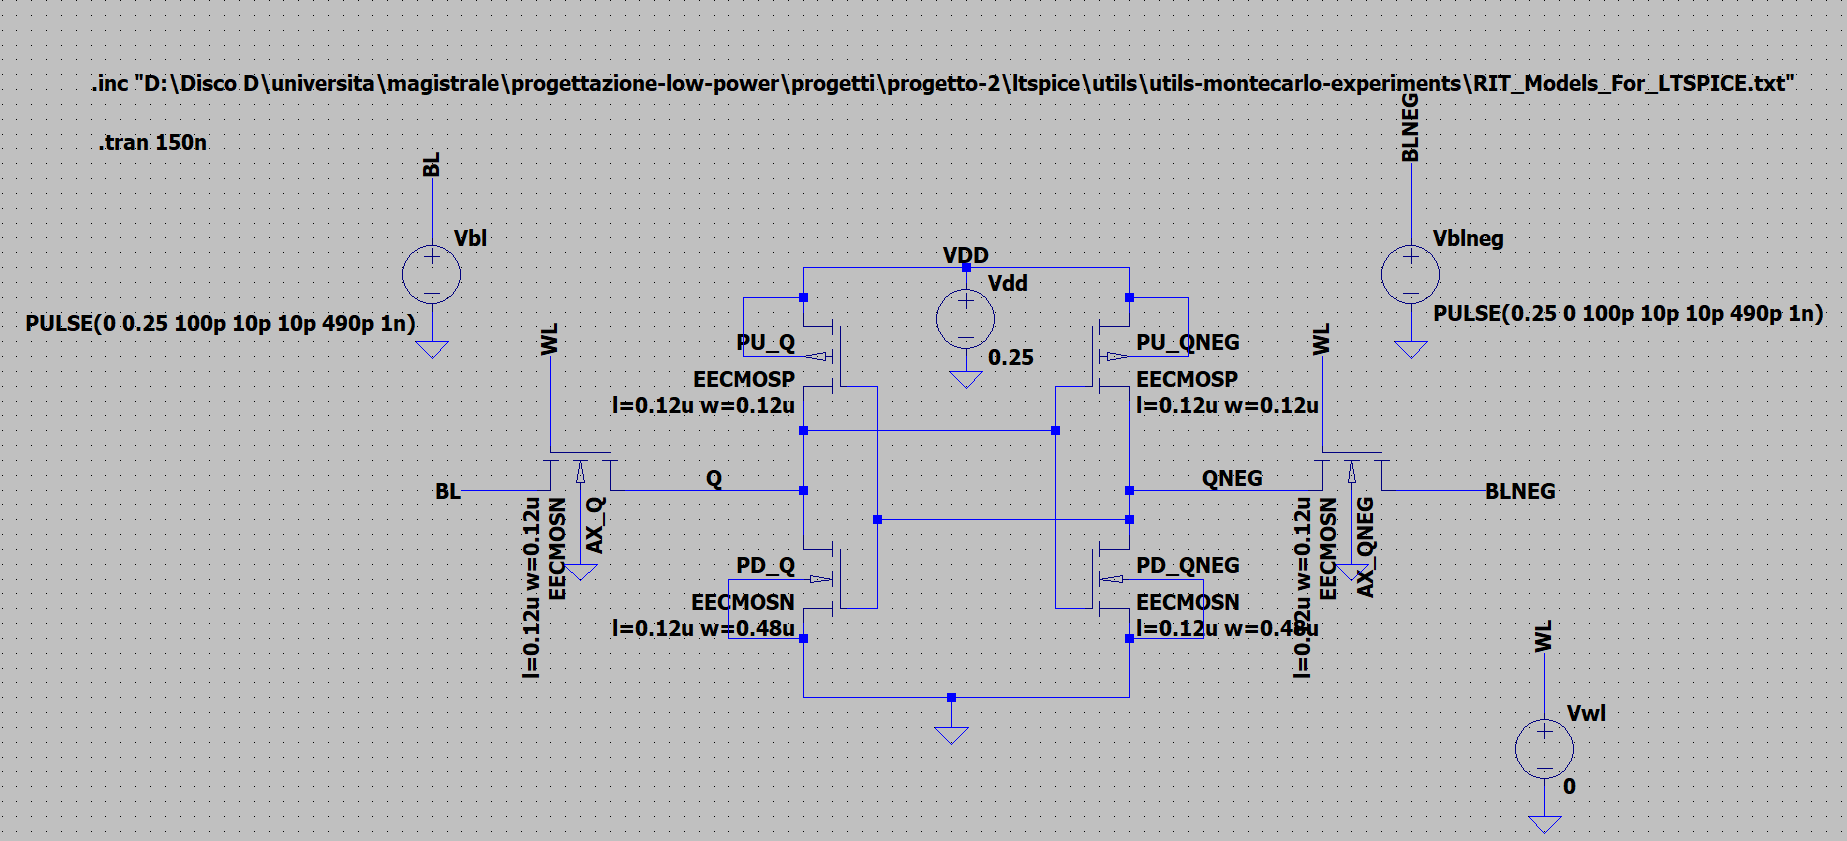

VDD Scaling Initialised
****************************************************************************************************************
vdd = 1.0 V
File opened successfully: ../../ltspice/models/standard/hold/transient/standard_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\standard\hold\standard_hold_1.raw, Log file: data\standard\hold\standard_hold_1.log
File opened successfully: data\standard\hold\standard_hold_1.raw
i_leak_mean_standard_transient_hold = 7.845285310281724e-09 A
i_leak_stdev_standard_transient_hold = 1.6801825516545944e-08 A
****************************************************************************************************************
vdd = 0.95 V
File opened successfully: ../../ltspice/models/standard/hold/transient/standard_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\standard\hold\standard_hold_1.raw, Log file: data\standard\hold\standard_hold_1.log
File opened successfully: data\standard\hold\standard_hold_1.raw
i_leak_mean_standard_tran

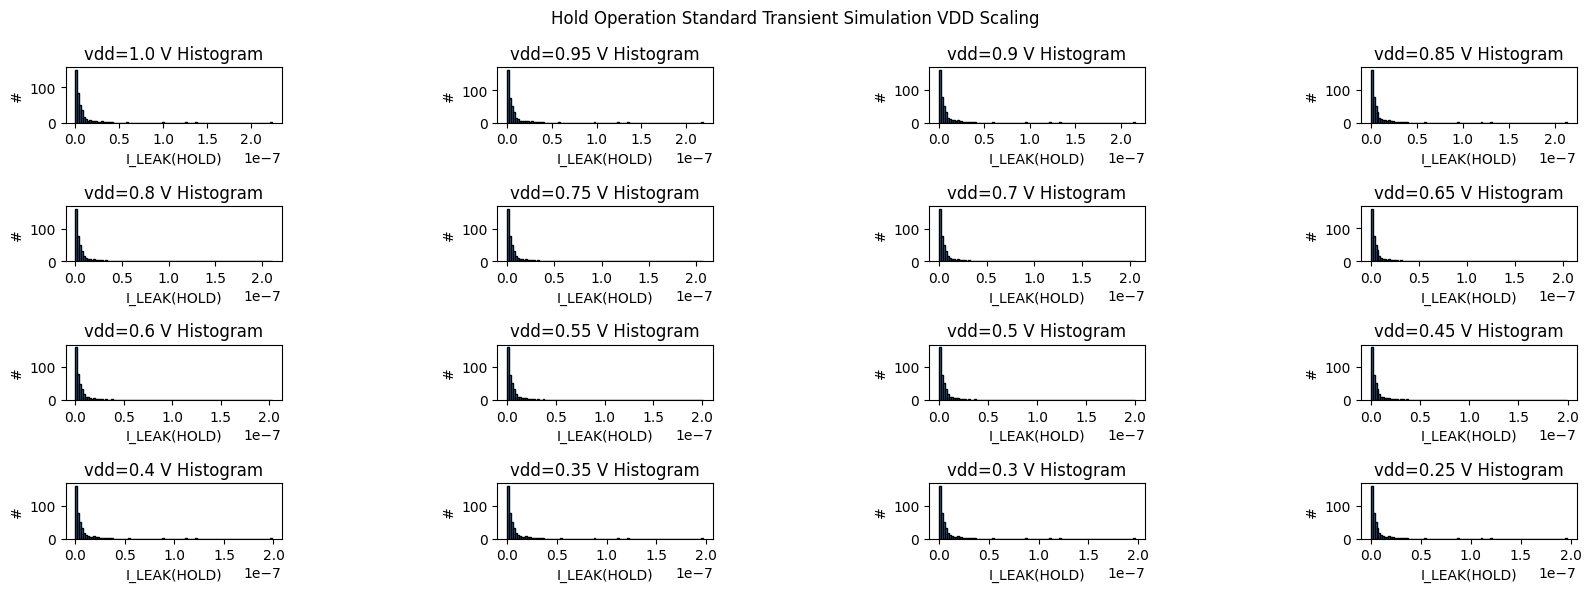

In [18]:
schematic_image_path=os.path.join(schematics, "standard_transient.png")
display(Image(schematic_image_path))

iterations_scaling = 16
rows = round(int(np.sqrt(iterations_scaling)))
tmp = iterations_scaling % rows
iterations = iterations_scaling
if tmp == 1:
    iterations = iterations_scaling + (rows-1)
elif tmp == 2:
    iterations = iterations_scaling + (rows-2)
cols = int(iterations / rows)
fig_standard_transient_hold_ileak, axs_standard_transient_hold_ileak = plt.subplots(rows, cols, figsize=(16, 6))
plt.suptitle("Hold Operation Standard Transient Simulation VDD Scaling")
vdd_start = 1.0
vdd_stop = vdd_start - (iterations / 10)
vdd_step = 0.05
print('VDD Scaling Initialised')
row = 0
col = 0
vdd_standard_transient_scaled = []
i_leak_standard_transient_hold_mean = []
i_leak_standard_transient_hold_stdev = []
for scaling in np.arange(vdd_start, vdd_stop, -vdd_step):
    if row == rows:
        break
    vdd_scaled = round(scaling, 2)
    vdd_standard_transient_scaled.append(vdd_scaled)
    print('****************************************************************************************************************')
    print(f'vdd = {vdd_scaled} V')
    (
        steps, 
        time_standard_transient_hold, 
        i_leaks_standard_transient_hold, 
        v_q_standard_transient_hold, 
        v_q_neg_standard_transient_hold,
        v_dd_standard_transient_hold,
        v_wl_standard_transient_hold,
        v_bl_standard_transient_hold,
        v_blneg_standard_transient_hold, 
        standard_hold_transient_log
    ) = __init_model__(
        operation_type=OperationType.HOLD,
        circuit_type=CircuitType.STANDARD_TRANSIENT, 
        asc_file_path=os.path.join(ltspice, "standard/hold/transient/standard_hold.asc"),
        schematic_image_path=os.path.join(schematics, "standard_transient.png"),
        request_plot_schematic=RequestPlotSchematic.FALSE,
        vdd=f'{vdd_scaled}',
        vsweep=vsweep_standard_transient,
        vwl=vwl_hold,
        vbl=f'{vdd_scaled}',
        vblneg=f'{vdd_scaled}',
        params=[rit_models_montecarlo, step_param_run_standard_transient, dc_vsweep_standard]
    )

    i_leak_ax_q = i_leaks_standard_transient_hold[0]
    i_leak_pu_q = i_leaks_standard_transient_hold[1]  
    i_leak_pd_qneg = i_leaks_standard_transient_hold[2]

    ileakaxq = []
    ileakpuq = []
    ileakpdqneg = []

    for step in range(len(steps)):

        ileakaxq_value = i_leak_ax_q.get_wave(step)
        ileakpuq_value = i_leak_pu_q.get_wave(step)
        ileakpdqneg_value = i_leak_pd_qneg.get_wave(step)

        ileakaxq.append(abs(ileakaxq_value))
        ileakpuq.append(abs(ileakpuq_value))
        ileakpdqneg.append(abs(ileakpdqneg_value))

    
    ileakaxq_transient = []
    ileakpuq_transient = []
    ileakpdqneg_transient = []
    for i, value in enumerate(ileakaxq):
        ileakaxq_transient.append(value[len(value)-1])
    for i, value in enumerate(ileakpuq):
        ileakpuq_transient.append(value[len(value)-1])
    for i, value in enumerate(ileakpdqneg):   
        ileakpdqneg_transient.append(value[len(value)-1])
    
    i_leak_hold = [value1+value2+value3 for value1, value2, value3 in zip(ileakaxq_transient, ileakpuq_transient, ileakpdqneg_transient)]
    axs_standard_transient_hold_ileak[row, col].hist(i_leak_hold, bins=100, edgecolor='black')
    axs_standard_transient_hold_ileak[row, col].set_xlabel("I_LEAK(HOLD)")
    axs_standard_transient_hold_ileak[row, col].set_ylabel("#")
    axs_standard_transient_hold_ileak[row, col].set_title(f"vdd={vdd_scaled} V Histogram")

    i_leak_mean = mean(i_leak_hold)
    i_leak_stdev = stdev(i_leak_hold)
    i_leak_standard_transient_hold_mean.append(i_leak_mean)
    i_leak_standard_transient_hold_stdev.append(i_leak_stdev)
    print(f'i_leak_mean_standard_transient_hold = {i_leak_mean} A')
    print(f'i_leak_stdev_standard_transient_hold = {i_leak_stdev} A')


    if col == (cols-1):
        row = row + 1
        col = 0
    else:
        col = col + 1   

plt.tight_layout()
plt.subplots_adjust(hspace=1.5, wspace=1)
save_image(image_path=os.path.join(images, "hold_operation_transient_vdd_scaling.png"), plt=plt)
plt.show()

In [19]:
print("{:<10} {:<25} {:<25} {:<50}".format("VDD", "SNM(HOLD)", "SNM(READ)", "I_LEAK"))
for (
        vdd, 
        snm_hold_mean, 
        snm_hold_stdev, 
        snm_read_mean, 
        snm_read_stdev, 
        ileak_mean, 
        i_leak_stdev
) in zip(
    vdd_standard_transient_scaled, 
    snm_gaussian_vth_hold_mean, 
    snm_gaussian_vth_hold_stdev, 
    snm_gaussian_vth_read_mean,
    snm_gaussian_vth_read_stdev,
    i_leak_standard_transient_hold_mean,
    i_leak_standard_transient_hold_stdev
):
    vdd_str = f'{vdd} V'
    snm_hold_str = f'({round(snm_hold_mean,3)} mV, {round(snm_hold_stdev,3)} mV)'
    snm_read_str = f'({round(snm_read_mean,3)} mV, {round(snm_read_stdev,3)} mV)'
    ileak_str = f'({ileak_mean} A, {i_leak_stdev} A)'
    print("{:<10} {:<25} {:<25} {:<50}".format(vdd_str, snm_hold_str, snm_read_str, ileak_str))

VDD        SNM(HOLD)                 SNM(READ)                 I_LEAK                                            
1.0 V      (259.904 mV, 25.208 mV)   (143.852 mV, 24.79 mV)    (7.845285310281724e-09 A, 1.6801825516545944e-08 A)
0.95 V     (254.936 mV, 24.763 mV)   (143.197 mV, 24.549 mV)   (7.474570296039929e-09 A, 1.6498557280090842e-08 A)
0.9 V      (249.502 mV, 24.219 mV)   (142.028 mV, 24.125 mV)   (7.313843308764945e-09 A, 1.6236381586622756e-08 A)
0.85 V     (243.477 mV, 23.55 mV)    (140.144 mV, 23.487 mV)   (7.203893481744217e-09 A, 1.6007196717948645e-08 A)
0.8 V      (236.682 mV, 22.729 mV)   (137.425 mV, 22.649 mV)   (7.113895694743633e-09 A, 1.5807449968100344e-08 A)
0.75 V     (228.888 mV, 21.755 mV)   (133.602 mV, 21.584 mV)   (7.037005644860983e-09 A, 1.5633656765112678e-08 A)
0.7 V      (219.79 mV, 20.652 mV)    (128.467 mV, 20.325 mV)   (6.9707777328176235e-09 A, 1.5482634518698697e-08 A)
0.65 V     (209.04 mV, 19.501 mV)    (121.778 mV, 18.956 mV)   (6.91368073901799

<h2>Comparative Analysis</h2>

File updated successfully: ../../images/comparative_analysis_vdd_scaling_1.png


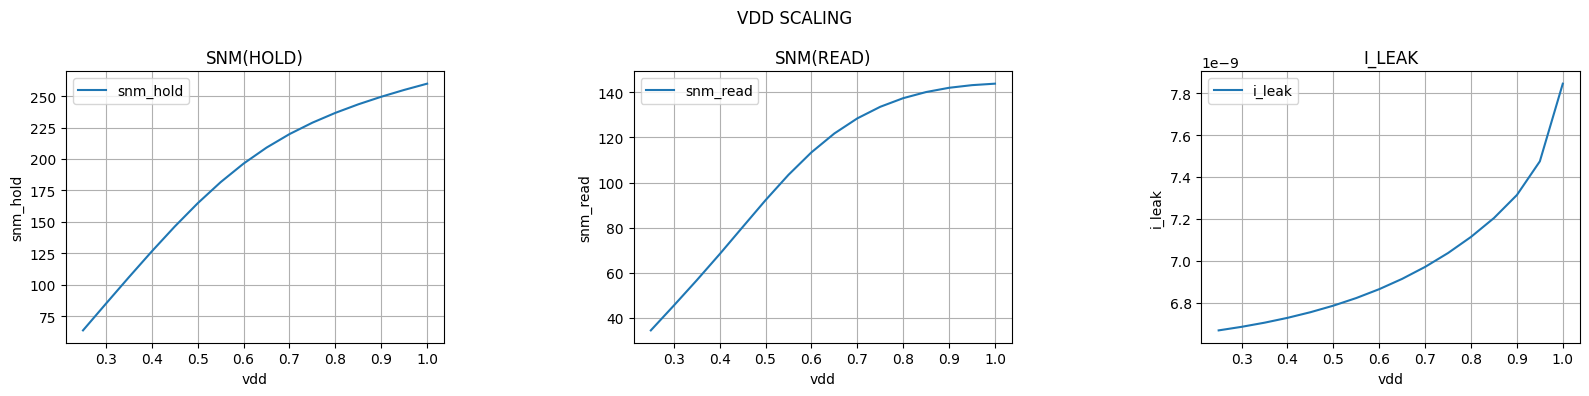

In [20]:
fig_table_1, axs_table_1 = plt.subplots(1, 3, figsize=(16, 4))
plt.suptitle("VDD SCALING")

axs_table_1[0].plot(vdd_gaussian_vth_scaled, snm_gaussian_vth_hold_mean)
axs_table_1[0].set_xlabel("vdd")
axs_table_1[0].set_ylabel("snm_hold")
axs_table_1[0].legend(["snm_hold"])
axs_table_1[0].set_title("SNM(HOLD)")
axs_table_1[0].grid()

axs_table_1[1].plot(vdd_gaussian_vth_scaled, snm_gaussian_vth_read_mean)
axs_table_1[1].set_xlabel("vdd")
axs_table_1[1].set_ylabel("snm_read")
axs_table_1[1].legend(["snm_read"])
axs_table_1[1].set_title("SNM(READ)")
axs_table_1[1].grid()

axs_table_1[2].plot(vdd_standard_transient_scaled, i_leak_standard_transient_hold_mean)
axs_table_1[2].set_xlabel("vdd")
axs_table_1[2].set_ylabel("i_leak")
axs_table_1[2].legend(["i_leak"])
axs_table_1[2].set_title("I_LEAK")
axs_table_1[2].grid()

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
save_image(image_path=os.path.join(images, "comparative_analysis_vdd_scaling_1.png"), plt=plt)
plt.show()

File updated successfully: ../../images/comparative_analysis_vdd_scaling_2.png


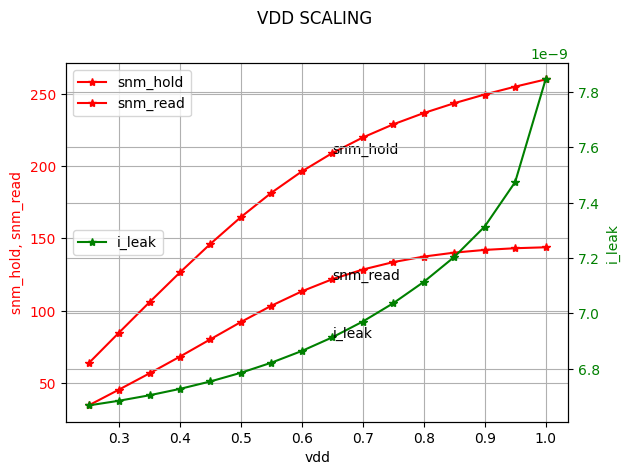

In [21]:
fig_table_2, axs_table_2_1 = plt.subplots(1, 1)
plt.suptitle("VDD SCALING")
axs_table_2_1.plot(vdd_gaussian_vth_scaled, snm_gaussian_vth_hold_mean, '-*', label='snm_hold', color='red')
axs_table_2_1.text(vdd_gaussian_vth_scaled[7], snm_gaussian_vth_hold_mean[7], 'snm_hold')
axs_table_2_1.plot(vdd_gaussian_vth_scaled, snm_gaussian_vth_read_mean, '-*', label='snm_read', color='red')
axs_table_2_1.text(vdd_gaussian_vth_scaled[7], snm_gaussian_vth_read_mean[7], 'snm_read')
axs_table_2_1.set_xlabel("vdd")
axs_table_2_1.set_ylabel("snm_hold, snm_read", color='red')
axs_table_2_1.tick_params(axis='y', labelcolor='red')
axs_table_2_1.legend(["snm_hold", "snm_read"], loc='upper left')

axs_table_2_2 = axs_table_2_1.twinx()
axs_table_2_2.plot(vdd_standard_transient_scaled, i_leak_standard_transient_hold_mean, '-*', label='i_leak', color='green')
axs_table_2_2.text(vdd_standard_transient_scaled[7], i_leak_standard_transient_hold_mean[7], 'i_leak')
axs_table_2_2.set_ylabel("i_leak", color='green')
axs_table_2_2.tick_params(axis='y', labelcolor='green')
axs_table_2_2.legend(["i_leak"], loc='center left')

axs_table_2_1.grid()
axs_table_2_2.grid()

fig_table_2.tight_layout()
save_image(image_path=os.path.join(images, "comparative_analysis_vdd_scaling_2.png"), plt=plt)
plt.show()